In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import pandas as pd

# other possible packages: pysptk, surfboard, torchaudio
import antropy as ant # for entropy computation
from scipy.stats import entropy

import warnings
warnings.filterwarnings("ignore")

import sklearn
import scipy
import math

In [2]:
data_path = "../data"
audio1_path = os.path.join(data_path, "wav/03a01Fa.wav")
audio2_path = os.path.join(data_path, "wav/03a01Nc.wav")
audio3_path = os.path.join(data_path, "wav/03a07Wc.wav")

In [3]:
# load audio data
audio1, sample_rate1 = librosa.load(audio1_path, sr=None) # sr=None to keep consistency with the database at 16kHz
audio2, sample_rate2 = librosa.load(audio2_path, sr=None)
audio3, sample_rate3 = librosa.load(audio3_path, sr=None)

In [4]:
sample_rate1 # -> always the same? read in paper or check here! 
# actually in the paper they say they downsampled to 16kHz but here we have 22.05 kHz; could be due to CD recordings are
# often measured in 44.1 kHz and divisions 22.05 kHz or 11.025 kHz

16000

# Audio loading

In [5]:
ipd.Audio(audio1_path) 

In [6]:
ipd.Audio(audio2_path) 

In [7]:
ipd.Audio(audio3_path) 

# Waveform plotting

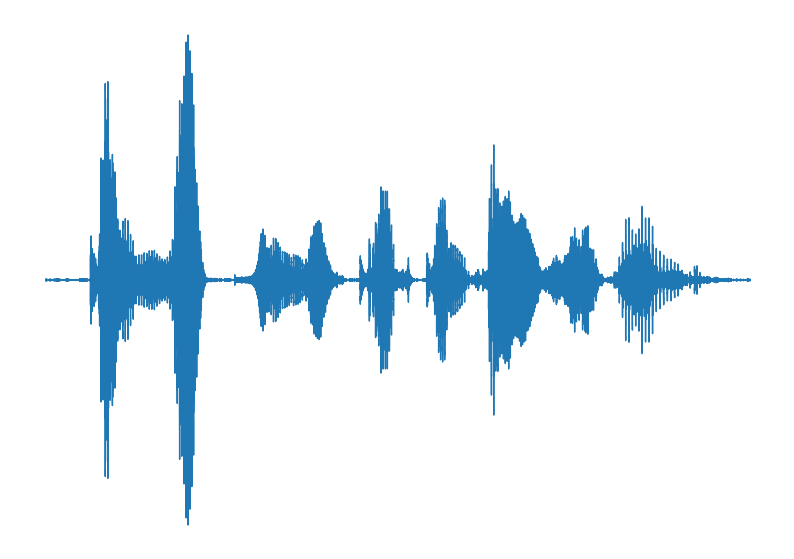

In [86]:
plt.figure(figsize=(10,7))
plt.axis('off')
librosa.display.waveshow(audio1, sr=sample_rate1)
plt.show()

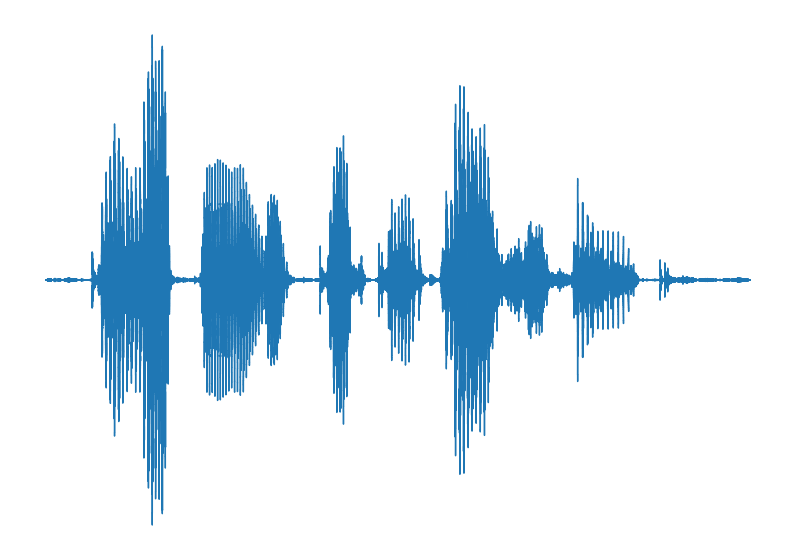

In [9]:
plt.figure(figsize=(10,7))
plt.axis('off')
librosa.display.waveshow(audio2, sr=sample_rate2)
plt.show()

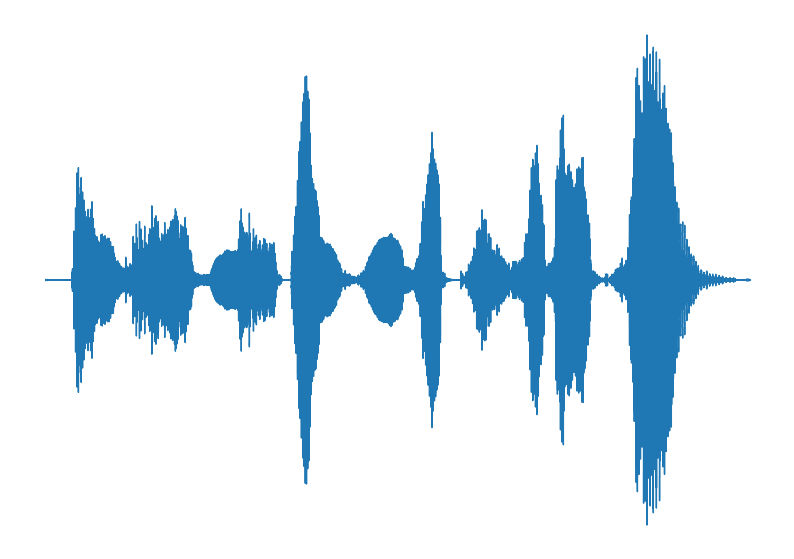

In [10]:
plt.figure(figsize=(10,7))
plt.axis('off')
librosa.display.waveshow(audio3, sr=sample_rate3)
plt.show()

# Harmonic percursive, mono, stereo

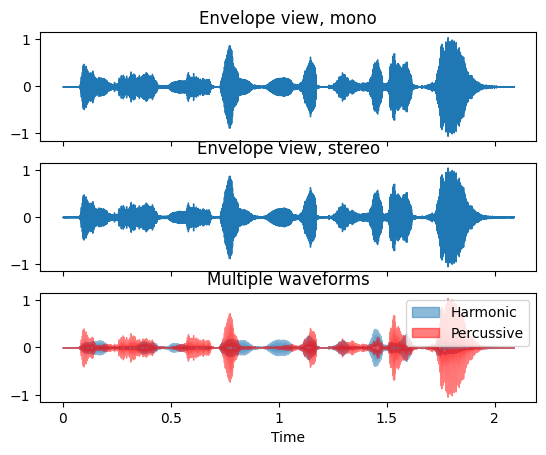

In [11]:
y, sr = librosa.load(audio3_path)
fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()

y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[2], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')
ax[2].set(title='Multiple waveforms')
ax[2].legend()

y, sr = librosa.load(audio3_path, mono=False)
librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[1].set(title='Envelope view, stereo')       # according to Darshit not correct; would need to show two different plots
ax[1].label_outer()

# Spectrogram

In [12]:
def plot_spectrogram(signal, name):
    """Compute power spectrogram with Short-Time Fourier Transform and plot result."""
    spectrogram = librosa.amplitude_to_db(librosa.stft(signal))
    plt.figure(figsize=(20, 15))
    librosa.display.specshow(spectrogram, y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Log-frequency power spectrogram for {name}")
    plt.xlabel("Time")
    plt.show()

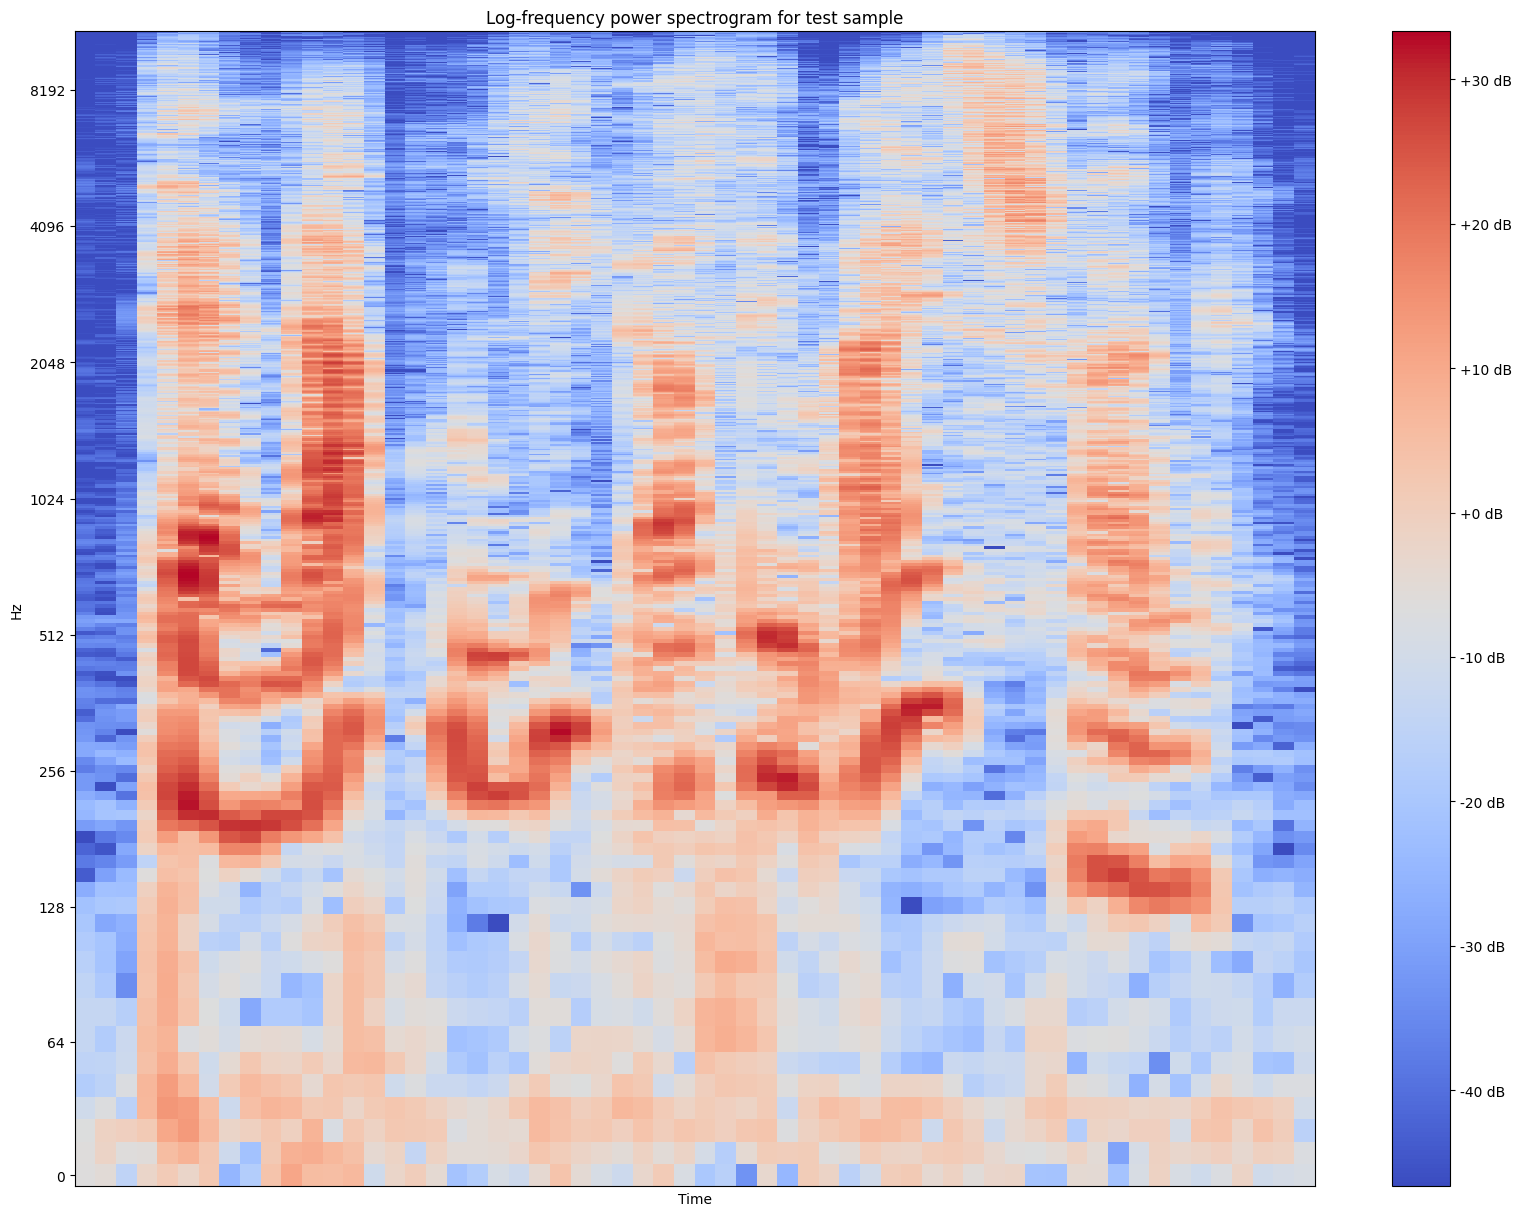

In [267]:
plot_spectrogram(audio1, "test sample")

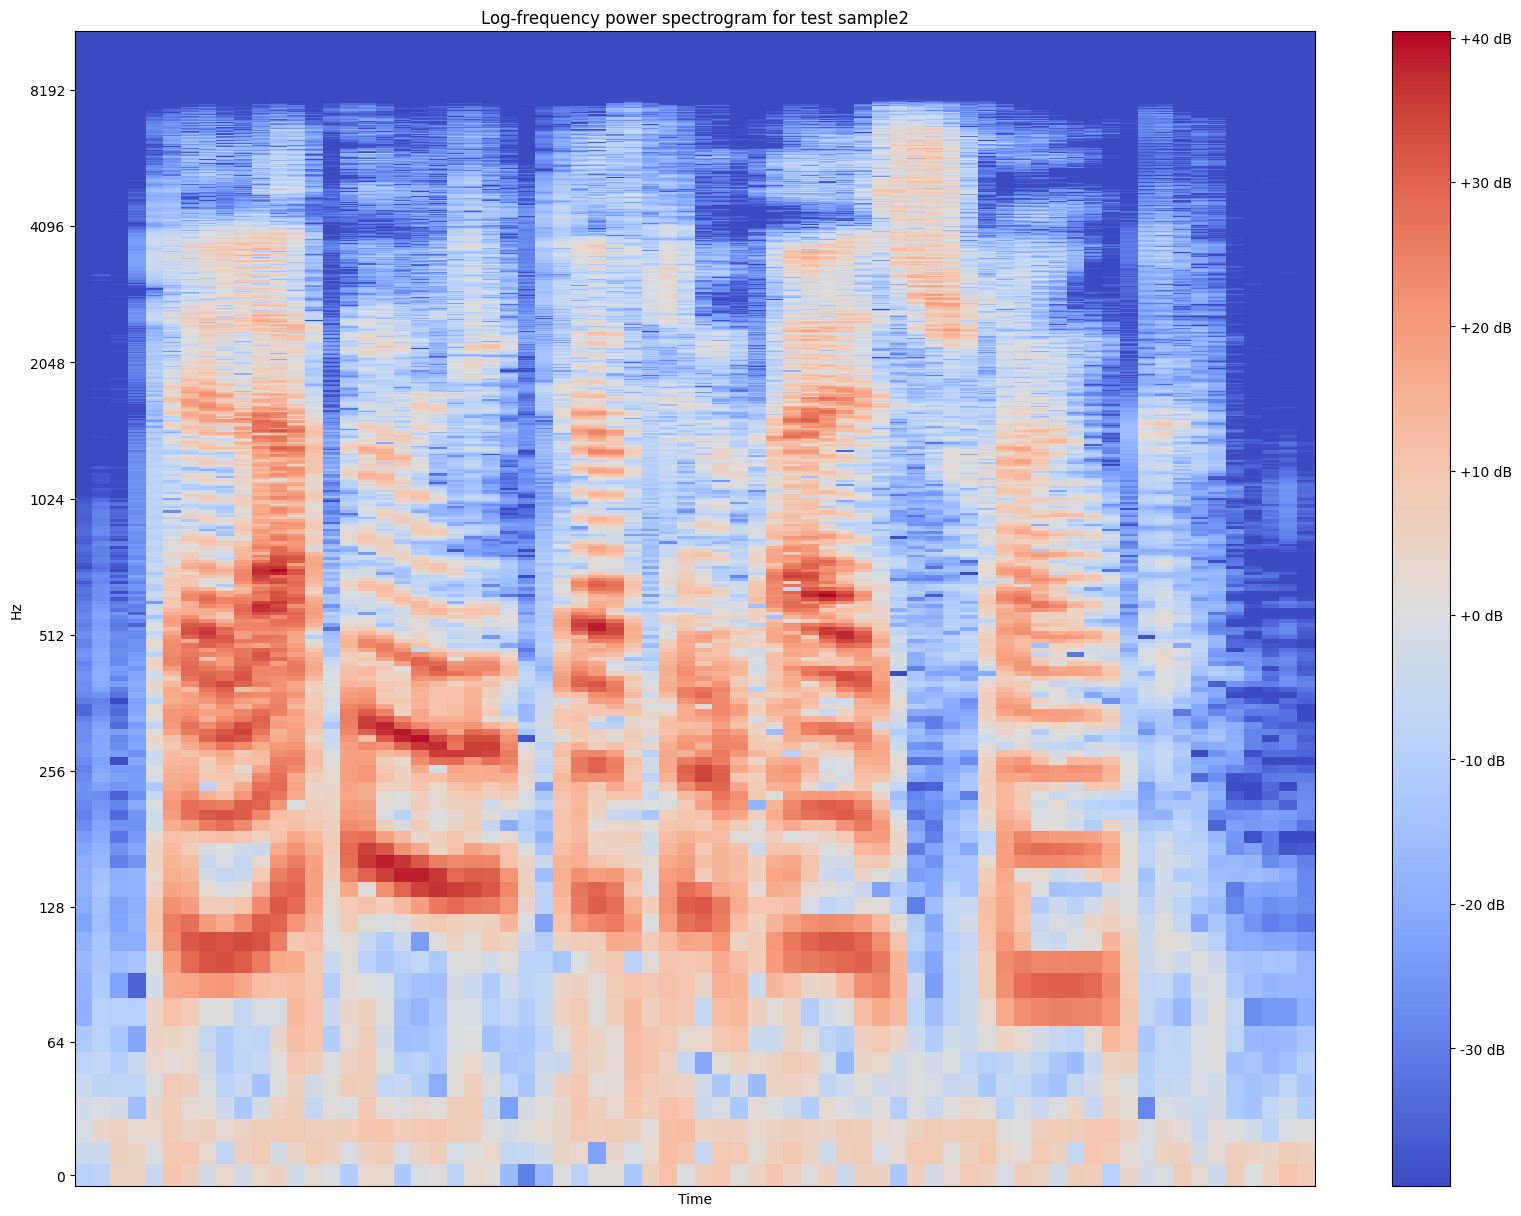

In [14]:
plot_spectrogram(audio2, "test sample2")

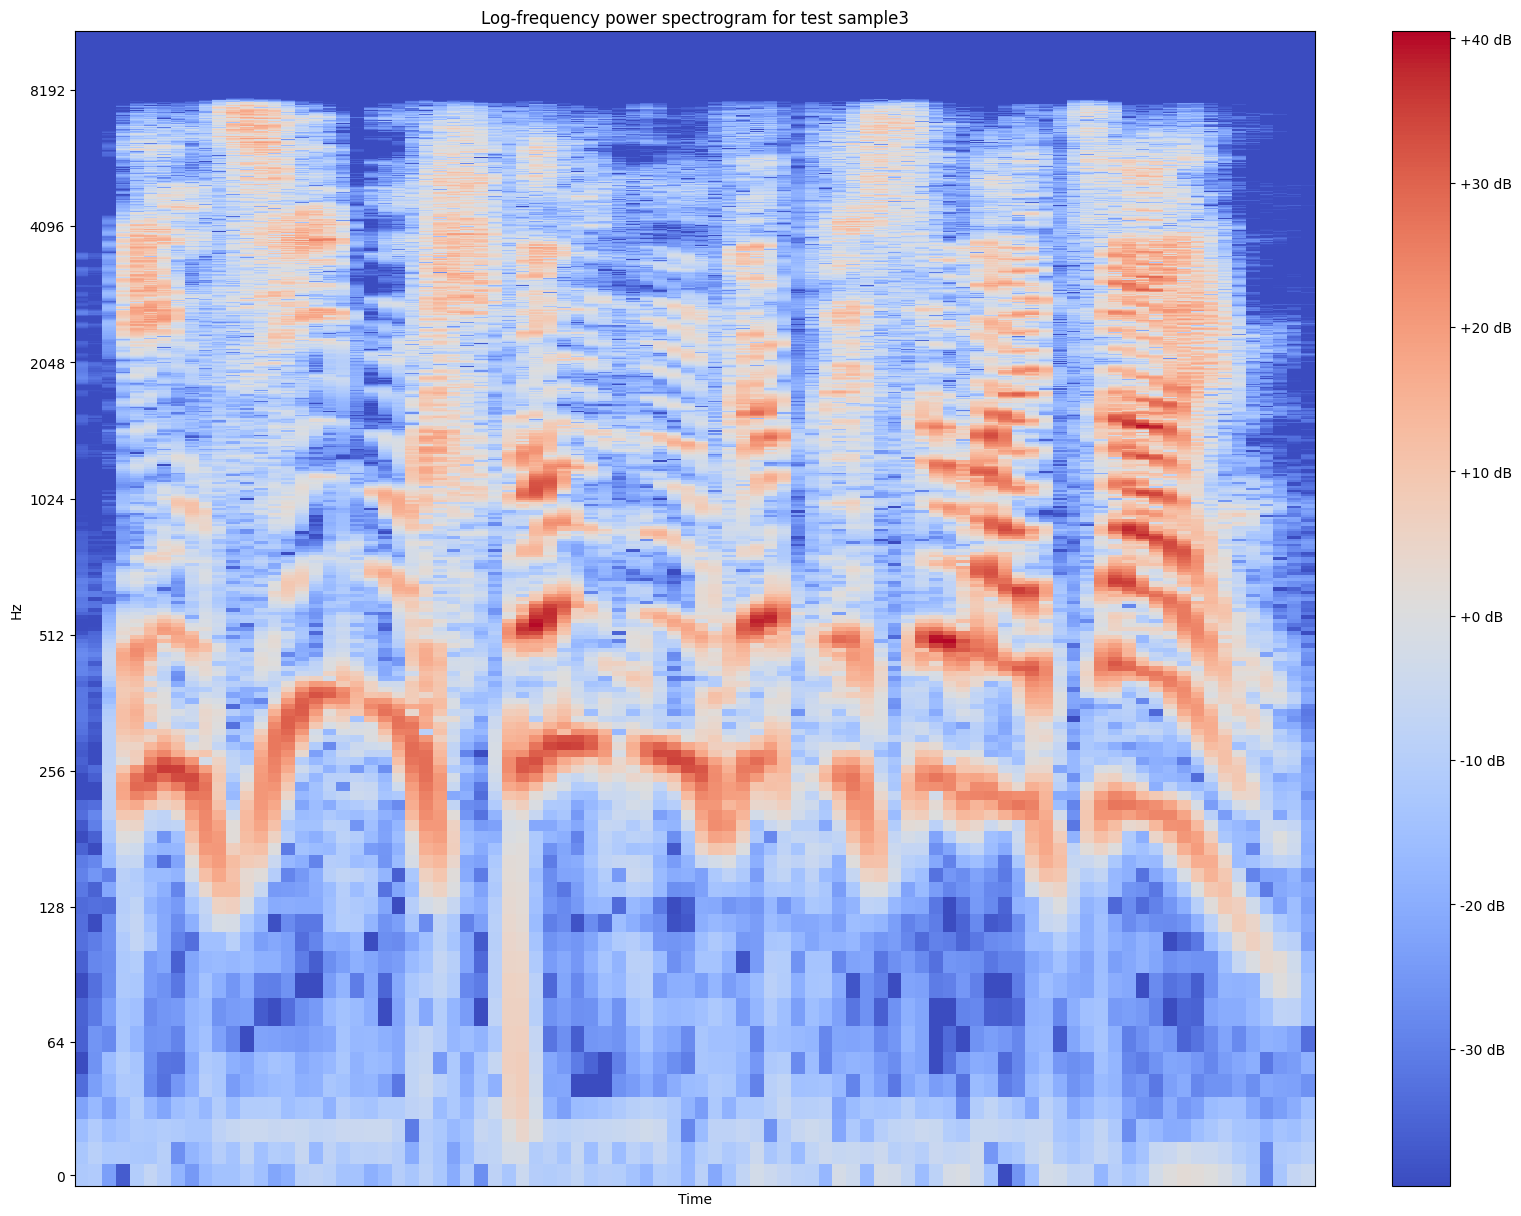

In [15]:
plot_spectrogram(audio3, "test sample3")

In [16]:
librosa.feature.chroma_stft(y=audio1, sr=sample_rate1)

array([[0.93444663, 0.6100306 , 0.62872726, 0.58853376, 0.43836588,
        0.37302265, 0.72770137, 0.60876995, 0.18757756, 0.15453304,
        0.6669064 , 0.74053204, 0.3025914 , 0.24613263, 0.45422995,
        0.11650255, 0.15989363, 0.22838767, 0.23589009, 0.18326393,
        0.8672082 , 0.49799344, 0.19454847, 0.05979111, 0.08232401,
        0.093442  , 0.02137363, 0.00388827, 0.0048637 , 0.0089107 ,
        0.04617546, 0.02890844, 0.02592124, 0.02632438, 0.08082341,
        0.3675803 , 0.25725594, 0.31738424, 0.04879644, 0.10254431,
        0.34305575, 0.49271736, 0.7994773 , 0.91180575, 0.5311978 ,
        0.01821144, 0.00442616, 0.011134  , 0.08924174, 0.5755624 ,
        0.27700353, 0.15172508, 0.26391825, 0.21569368, 0.12272322,
        0.41282913, 1.        , 1.        , 0.77616113, 0.1388679 ,
        0.74127185, 0.9505152 , 0.4083049 , 0.15588711, 0.15960325,
        0.12251142, 0.3600821 , 0.24073985, 0.20228463, 0.37022993,
        0.50265366, 0.17677873, 0.0173884 , 0.02

In [17]:
librosa.feature.melspectrogram(y=audio1, sr=sample_rate1)

array([[1.0677721e-02, 2.9677214e-02, 4.1329917e-02, ..., 1.3041709e-01,
        6.0334899e-02, 1.3437546e-02],
       [6.0990024e-03, 4.0542455e-03, 2.5989630e-03, ..., 6.7272345e-03,
        7.4613462e-03, 1.1390247e-02],
       [3.0280044e-03, 1.7488347e-03, 2.9354234e-04, ..., 3.5673783e-03,
        3.5584774e-03, 3.1496880e-03],
       ...,
       [2.2437059e-10, 5.6218509e-11, 1.5414272e-17, ..., 4.3745606e-17,
        7.2025913e-11, 2.3716977e-08],
       [1.8196623e-10, 4.5691912e-11, 2.1472043e-18, ..., 1.9891636e-17,
        7.0553105e-11, 2.3225430e-08],
       [1.5718032e-10, 3.9537436e-11, 2.1577573e-18, ..., 1.1964407e-17,
        6.9633833e-11, 2.2919052e-08]], dtype=float32)

In [18]:
librosa.feature.tonnetz(y=audio1, sr=sample_rate1)

array([[-2.54346130e-02, -1.16977078e-02, -6.67656684e-03,
        -3.67343185e-04,  3.47166036e-03,  3.88812903e-03,
         5.81213594e-03, -1.78950944e-02, -1.22536204e-02,
         1.11729260e-02, -8.44720306e-03,  4.57041036e-02,
         1.11998998e-01,  1.24710004e-01,  8.80779372e-02,
         8.24719186e-02,  4.02516795e-02,  1.73949710e-02,
         5.99191162e-03,  1.52190801e-02,  1.22398047e-02,
        -8.89754903e-03, -9.64897818e-03, -5.29611718e-03,
         8.01462361e-03,  2.96829884e-02,  6.21591801e-02,
         1.02926938e-01,  1.27658618e-01,  9.98196270e-02,
         6.62622216e-02,  2.96509212e-02, -5.52604321e-04,
        -3.09076071e-02, -2.89844757e-02, -3.43699762e-02,
        -1.71826189e-02, -1.05553187e-03,  1.50871116e-02,
         6.82447333e-02, -3.31841870e-02, -1.40175873e-02,
         9.88621134e-03, -2.56660022e-02, -5.18586679e-02,
        -5.17906468e-02, -4.85106041e-02, -5.66485650e-02,
        -5.27889913e-02, -3.60622497e-02, -1.96286811e-0

In [19]:
librosa.feature.zero_crossing_rate(y=audio1)

array([[0.00341797, 0.02148438, 0.03955078, 0.04296875, 0.09130859,
        0.09130859, 0.08691406, 0.09570312, 0.05908203, 0.04736328,
        0.03808594, 0.03173828, 0.0234375 , 0.02539062, 0.03710938,
        0.05419922, 0.0703125 , 0.07763672, 0.06298828, 0.04199219,
        0.02539062, 0.03222656, 0.04394531, 0.046875  , 0.04492188,
        0.02978516, 0.02490234, 0.03125   , 0.0390625 , 0.04394531,
        0.04443359, 0.04199219, 0.07763672, 0.10205078, 0.10058594,
        0.11230469, 0.08349609, 0.06494141, 0.078125  , 0.10253906,
        0.17382812, 0.16748047, 0.14892578, 0.13818359, 0.05664062,
        0.05224609, 0.05566406, 0.02929688, 0.04296875, 0.05957031,
        0.078125  , 0.09472656, 0.09277344, 0.08349609, 0.07421875,
        0.05712891, 0.07958984, 0.19921875, 0.31347656, 0.41357422,
        0.46728516, 0.4140625 , 0.36376953, 0.29736328, 0.25146484,
        0.20166016, 0.14160156, 0.11962891, 0.08496094, 0.06787109,
        0.05419922, 0.03955078, 0.02392578, 0.01

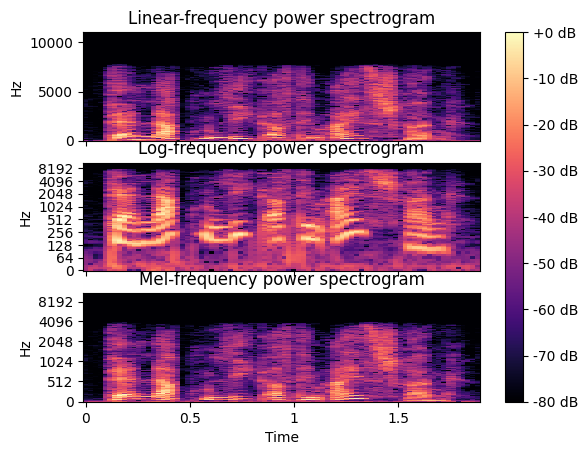

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio1)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sample_rate1, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 512
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio1, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sample_rate1, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()

librosa.display.specshow(D, y_axis='mel', sr=sample_rate1, hop_length=hop_length,
                         x_axis='time', ax=ax[2])
ax[2].set(title='Mel-frequency power spectrogram')
ax[2].label_outer()

fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

# Function for applying to all files

In [371]:
# function for importing all wav files
audio_files = os.listdir(os.path.join(data_path, 'wav/'))

speaker_num_list = []
label_list = []
duration_list = []
zcr_list = []
mean_list = []
median_list = []
max_list = []
min_list = []

for audio_file in audio_files:
    audio_path = os.path.join(data_path, 'wav', audio_file)
    
    # load audio data
    y, sr = librosa.load(audio_path, sr=None)  
    
    
    """
    #### Naming conventions ####

    Every utterance is named according to the same scheme:
    Positions 1-2: number of speaker
    Positions 3-5: code for text
    Position 6: emotion (sorry, letter stands for german emotion word)
    Position 7: if there are more than two versions these are numbered a, b, c ....
    Example: 03a01Fa.wav is the audio file from Speaker 03 speaking text a01 with the emotion "Freude" (Happiness).
    """
    
    # get speaker number
    speaker_num_list.append(audio_file[:2])
    
    # get emotional label (use all versions?)
    label_dict = {'W':'anger', 'L':'boredom', 'E':'disgust', 'A':'fear', 'F':'happiness', 'T':'sadness', 'N':'neutral'}
    label_list.append(label_dict[audio_file[5]])
    
    # get duration 
    duration_list.append(librosa.get_duration(y=y, sr=sr)) # hop length & frame length are already correct (512, 2048)
    
    # zero-crossing rate
    zcr_list.append(librosa.feature.zero_crossing_rate(y=y)[0])
    
    # mean
    mean_list.append(np.mean(np.abs(y)))
    
    # median
    median_list.append(np.median(np.abs(y)))
    
    # max
    max_list.append(np.max(y))
    
    # min
    min_list.append(np.min(y))    
    

df = pd.DataFrame({'file':audio_files, 'speaker':speaker_num_list, 'emotion':label_list, 'duration':duration_list, 'zcr':zcr_list, 'mean':mean_list,
                   'median':median_list, 'max':max_list, 'min':min_list})

 # get speaker gender based on number
df['gender'] = 'female'
df['gender'][df['speaker'].isin(['03', '10', '11', '12', '15'])] = 'male'

In [372]:
df

file speaker    emotion  duration  \
0    03a01Fa.wav      03  happiness  1.898250   
1    03a01Nc.wav      03    neutral  1.611250   
2    03a01Wa.wav      03      anger  1.877813   
3    03a02Fc.wav      03  happiness  2.006250   
4    03a02Nc.wav      03    neutral  1.439812   
..           ...     ...        ...       ...   
530  16b10Lb.wav      16    boredom  3.442687   
531  16b10Tb.wav      16    sadness  3.500625   
532  16b10Td.wav      16    sadness  3.934188   
533  16b10Wa.wav      16      anger  2.414125   
534  16b10Wb.wav      16      anger  2.522500   

                                                   zcr      mean    median  \
0    [0.0185546875, 0.03662109375, 0.0615234375, 0....  0.043271  0.017822   
1    [0.005859375, 0.01171875, 0.03662109375, 0.046...  0.066645  0.019135   
2    [0.01513671875, 0.02880859375, 0.05322265625, ...  0.067903  0.024933   
3    [0.0439453125, 0.076171875, 0.09765625, 0.0927...  0.069940  0.027802   
4    [0.0068359375, 0.01171875, 0.033203125, 0.0415...  0.085794  0.028595   
..                                                 ...       ...       ...   
530  [0.01708984375, 0.021484375, 0.06494140625, 0....  0.075159  0.040314   
531  [0.00634765625, 0.02880859375, 0.08251953125, ...  0.109661  0.040649   
532  [0.01025390625, 0.0166015625, 0.10595703125, 0...  0.071876  0.027283   
533  [0.1015625, 0.15771484375, 0.2421875, 0.206542...  0.027512  0.011047   
534  [0.05859375, 0.13134765625, 0.1572265625, 0.17...  0.054634  0.024231   

          max       min  gender  
0    0.999969 -0.811890    male  
1    0.935303 -0.999847    male  
2    0.975800 -0.999969    male  
3    0.999634 -0.924469    male  
4    0.889465 -0.999847    male  
..        ...       ...     ...  
530  0.788452 -0.999969  female  
531  0.999969 -0.840179  female  
532  0.999969 -0.619659  female  
533  0.999969 -0.425629  female  
534  0.999908 -0.596344  female  

[535 rows x 10 columns]

In [23]:
df['mean'].describe()

count    535.000000
mean       0.076094
std        0.025480
min        0.026387
25%        0.057499
50%        0.071909
75%        0.090182
max        0.178859
Name: mean, dtype: float64

In [24]:
df['median'].describe()

count    535.000000
mean       0.037429
std        0.018537
min        0.008441
25%        0.024141
50%        0.032136
75%        0.047414
max        0.119993
Name: median, dtype: float64

In [25]:
df['max'].describe()

count    535.000000
mean       0.912942
std        0.132703
min        0.502740
25%        0.839754
50%        0.980192
75%        1.005573
max        1.093990
Name: max, dtype: float64

-> values are very different for the files! means it's hard to get a threshold value valid for all files -> therefore idea is to use mean of abs value as threshold

In [26]:
df.groupby('emotion').describe()

duration                                                    \
             count      mean       std       min       25%       50%   
emotion                                                                
anger        127.0  2.640816  0.728804  1.465850  2.090113  2.609887   
boredom       81.0  2.779001  0.804448  1.520091  2.074694  2.690567   
disgust       46.0  3.352856  1.073298  1.523855  2.552868  3.117211   
fear          69.0  2.233399  0.637359  1.225533  1.607982  2.081315   
happiness     71.0  2.543992  0.682695  1.481406  1.963651  2.463583   
neutral       79.0  2.359260  0.659166  1.430839  1.769773  2.235510   
sadness       62.0  4.052917  1.532624  1.735692  3.076361  3.863379   

                                mean            ...       max            \
                75%       max  count      mean  ...       75%       max   
emotion                                         ...                       
anger      3.116961  5.213515  127.0  0.057089  ...  1.019768  1.066536   
boredom    3.398776  4.525850   81.0  0.093790  ...  0.976765  1.022574   
disgust    3.943798  5.963855   46.0  0.076771  ...  1.000994  1.080715   
fear       2.711791  4.101406   69.0  0.080473  ...  1.003266  1.088129   
happiness  3.106848  3.930975   71.0  0.064852  ...  1.007921  1.093990   
neutral    2.822041  3.899229   79.0  0.086386  ...  1.002005  1.056015   
sadness    5.102392  8.978277   62.0  0.086286  ...  0.992619  1.090131   

             min                                                              \
           count      mean       std       min       25%       50%       75%   
emotion                                                                        
anger      127.0 -0.865689  0.145273 -1.070614 -0.986011 -0.918154 -0.756611   
boredom     81.0 -0.968740  0.070027 -1.026165 -1.003433 -0.998943 -0.985640   
disgust     46.0 -0.970636  0.075539 -1.033571 -1.007286 -0.998931 -0.984160   
fear        69.0 -0.970038  0.071762 -1.101940 -1.006907 -0.998415 -0.967243   
happiness   71.0 -0.874879  0.150463 -1.033788 -0.997457 -0.925463 -0.803188   
neutral     79.0 -0.930693  0.108225 -1.036698 -1.004525 -0.991746 -0.867835   
sadness     62.0 -0.966281  0.086964 -1.025660 -1.003413 -1.000232 -0.990063   

                     
                max  
emotion              
anger     -0.417251  
boredom   -0.717614  
disgust   -0.700909  
fear      -0.679772  
happiness -0.486334  
neutral   -0.579905  
sadness   -0.627526  

[7 rows x 40 columns]

In [27]:
duration = librosa.get_duration(y=audio2, sr=sample_rate2)
duration

1.6112925170068026

In [28]:
df['zcr_len'] = df['zcr'].str.len() # zcr have different lengths -> obviously because they have different durations

In [29]:
df

file    emotion  duration  \
0    03a01Fa.wav  happiness  1.898277   
1    03a01Nc.wav    neutral  1.611293   
2    03a01Wa.wav      anger  1.877823   
3    03a02Fc.wav  happiness  2.006259   
4    03a02Nc.wav    neutral  1.439819   
..           ...        ...       ...   
530  16b10Lb.wav    boredom  3.442721   
531  16b10Tb.wav    sadness  3.500635   
532  16b10Td.wav    sadness  3.934195   
533  16b10Wa.wav      anger  2.414150   
534  16b10Wb.wav      anger  2.522540   

                                                   zcr      mean    median  \
0    [0.00341796875, 0.021484375, 0.03955078125, 0....  0.043283  0.017788   
1    [0.005859375, 0.005859375, 0.0126953125, 0.027...  0.066612  0.018966   
2    [0.00830078125, 0.02197265625, 0.03076171875, ...  0.067925  0.024976   
3    [0.03515625, 0.05615234375, 0.07861328125, 0.0...  0.069904  0.027631   
4    [0.0068359375, 0.0068359375, 0.0078125, 0.0273...  0.085804  0.028618   
..                                                 ...       ...       ...   
530  [0.0166015625, 0.01904296875, 0.0234375, 0.039...  0.075134  0.040253   
531  [0.0, 0.02001953125, 0.03369140625, 0.04638671...  0.109530  0.040504   
532  [0.00830078125, 0.01220703125, 0.01220703125, ...  0.071857  0.027320   
533  [0.06982421875, 0.099609375, 0.14892578125, 0....  0.027512  0.011024   
534  [0.04541015625, 0.099609375, 0.15234375, 0.159...  0.054632  0.024204   

          max       min  zcr_len  
0    0.989185 -0.793622       82  
1    0.940210 -1.000460       70  
2    1.008495 -1.011148       81  
3    1.011801 -0.921925       87  
4    0.891944 -0.998372       63  
..        ...       ...      ...  
530  0.788838 -0.999903      149  
531  0.928428 -0.846430      151  
532  1.024189 -0.627526      170  
533  1.038615 -0.417251      104  
534  1.035536 -0.597347      109  

[535 rows x 9 columns]

# Energy

In [30]:
# overall magnitude of a signal corresponds to its energy.
def RMS_energy(y, hop_length=512, frame_length=2048):
    return librosa.feature.rms(y=y, hop_length=hop_length, frame_length=frame_length)[0]

In [31]:
rms=RMS_energy(audio1)

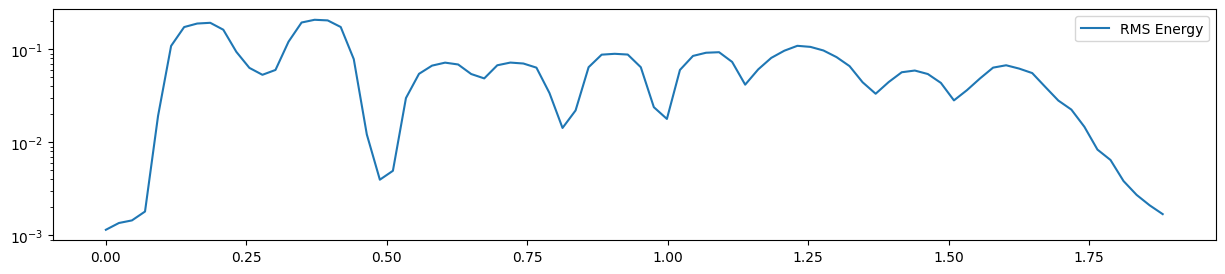

In [32]:
# Plot the RMS energy
plt.figure(figsize=(15, 3))
times = librosa.times_like(rms)
plt.semilogy(times, rms, label='RMS Energy')
plt.legend()
plt.show()

In [33]:
def energy2(x, hop_length=512, frame_length=2048):
    energy_2 = np.array([sum(abs(x[i:i+frame_length]**2)) for i in range(0, len(x), hop_length)])
    return (energy_2 - np.min(energy_2)) / (np.max(energy_2) - np.min(energy_2))

In [34]:
# detailed computation of feature vector length (number of frames on which we compute the features)
# source for understanding: https://superkogito.github.io/blog/2020/01/25/signal_framing.html
def feature_length_computation(y, sf, hop_length=512, frame_length=2048):
    duration = librosa.get_duration(y=y, sr=sr)
    
    # padding
    padding = [(0, 0) for _ in range(y.ndim)]
    padding[-1] = (int(frame_length // 2), int(frame_length // 2)) # (1024, 1024)
    # Pads with the edge values of array with 1024 padded to the edges of each axis
    y = np.pad(y, padding, mode="edge") # -> len(y) from 41857 to 43905 for audio1
    
    overall_samples = len(y) # 43905 for audio1
    overlap = frame_length - hop_length
    frames = int((overall_samples - overlap) / hop_length)
    return frames

In [228]:
feature_length_computation(audio1, sample_rate1)

60

In [229]:
feature_length_computation(audio2, sample_rate2)

70

In [230]:
def normalize(x):
    return sklearn.preprocessing.MinMaxScaler().fit_transform(np.array(x).reshape(-1,1))

In [499]:
# function to visualize different features across the wave signal
def feature_visualization(y, sf, features, title=None, base=2, sure_threshold=0.05, hop_length=512, frame_length=2048):
    t = librosa.frames_to_time(range(feature_length_computation(y, sf, hop_length=hop_length, frame_length=frame_length)
                                    ), hop_length=hop_length)
    
    plt.figure(figsize=(10, 5))
    librosa.display.waveshow(y, alpha=0.5)
    if 'spectral_entropy' in features:
        plt.plot(t, spectral_entropy(y, sf), label='spectral_entropy')
    if 'shannon_entropy' in features:
        plt.plot(t, shannon_entropy(y, base=base), label='shannon_entropy')
    if 'rms' in features:
        plt.plot(t, RMS_energy(y), label='rms_energy')
    if 'rms_log' in features:
        plt.plot(t, RMS_log_entropy(y), label='log rms')
    if 'ae' in features:
        plt.plot(t, amplitude_envelope(y), label='amplitude_envelope')
    if 'zcr' in features: 
        print(f"Overall number of zero crossings: {sum(librosa.zero_crossings(y))}")
        plt.plot(t, ZCR(y), color="r", label='zcr')
    if 'energy2' in features: # not necessary -> chose rms for norm energy
        plt.plot(t, energy2(y), label='energy2')
    if 'threshold_entropy' in features:
        plt.plot(t, threshold_entropy(y), label='threshold_entropy')
    if 'log_energy_entropy' in features:
        plt.plot(t, log_energy_entropy(y), label='log_energy_entropy')
    if 'sure_entropy' in features: 
        plt.plot(t, sure_entropy(y, threshold=sure_threshold), label='sure_entropy')
    if 'energy' in features:
        plt.plot(t, energy(y), label='energy')
    if 'spectral_centroid' in features:
        plt.plot(t, spectral_centroid(y, sf), label='spectral_centroid')
    
    
    plt.ylim((-1, 1))
    plt.xlim((t[0],t[-1]))
    plt.legend()
    plt.title(title)
    plt.show()

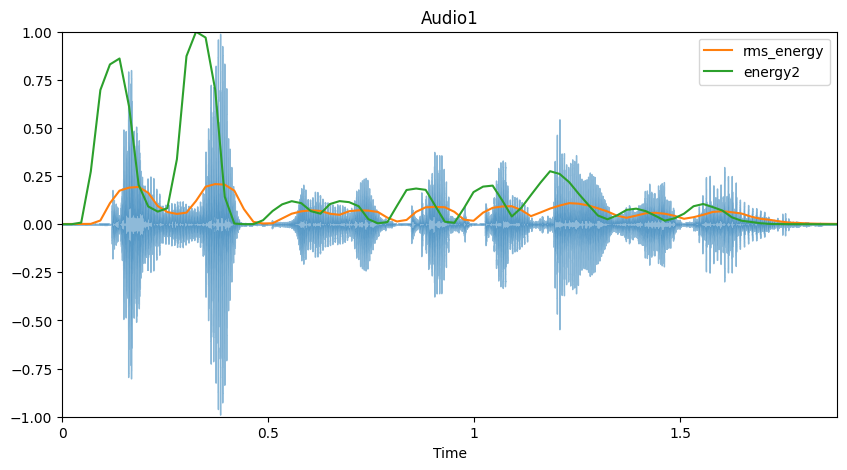

In [38]:
feature_visualization(audio1, sample_rate1, ['energy2', 'rms'], 'Audio1')

very similar! -> can use rms energy where $ RMS = \sqrt{\frac{1}{N} \sum{|x|}^2}$ which is actually like the L2-Norm; energy is usually defined as the total magnitude of the signal which would be $energy = \sum{|x|}^2$

In [39]:
def RMS_log_entropy(y, hop_length=512, frame_length=2048):
    S, phase = librosa.magphase(librosa.stft(y)) # separate spectrogram in magnitude and phase
    return librosa.feature.rms(S=S)[0]

[Text(0.5, 1.0, 'log Power spectrogram')]

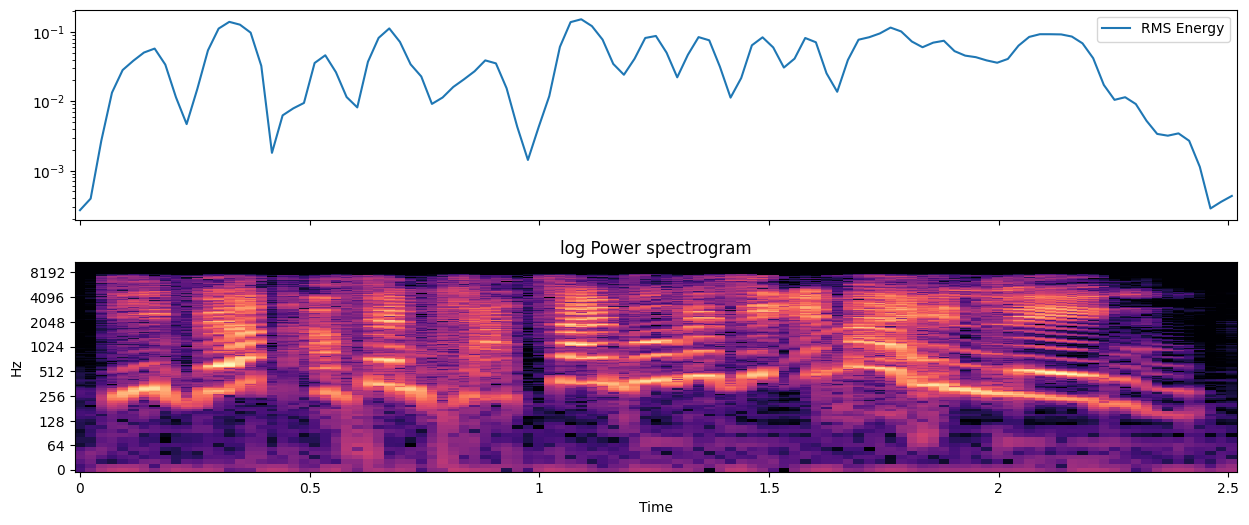

In [40]:
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)[0]

# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms, label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [41]:
def amplitude_envelope(y, frame_length=2048, hop_length=512):
  return np.array([max(y[i:i+frame_length]) for i in range(0, y.size, hop_length)])

In [474]:
def amplitude_envelope(y, frame_length=2048, hop_length=512):
  return np.array([np.mean(np.abs(y[i:i+frame_length])) for i in range(0, y.size, hop_length)])

In [471]:
np.average(audio1[0:512])

-0.0010380745

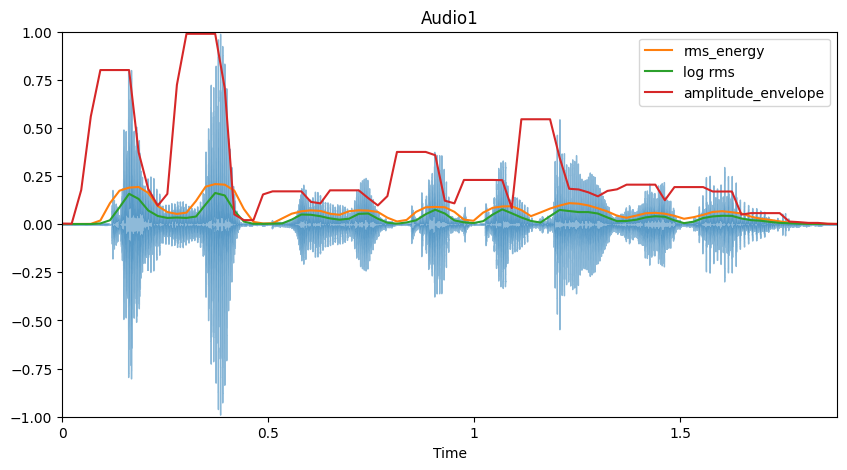

In [42]:
feature_visualization(audio1, sample_rate1, ['rms', 'rms_log', 'ae'], 'Audio1')

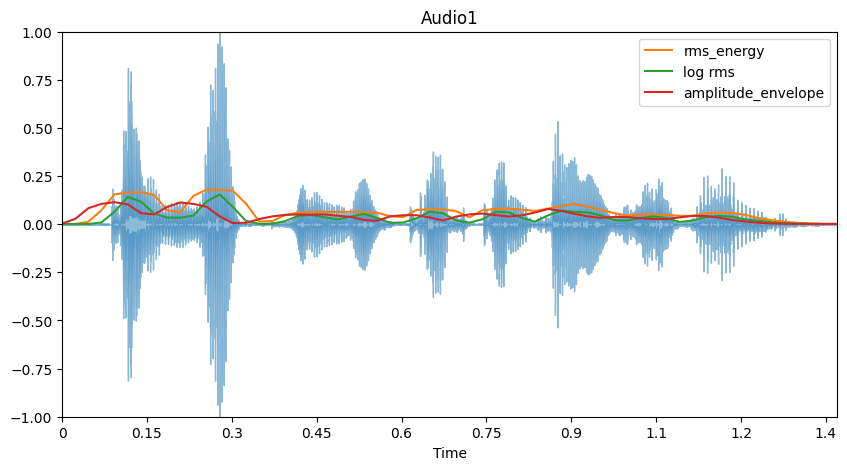

In [475]:
# with mean 
feature_visualization(audio1, sample_rate1, ['rms', 'rms_log', 'ae'], 'Audio1')

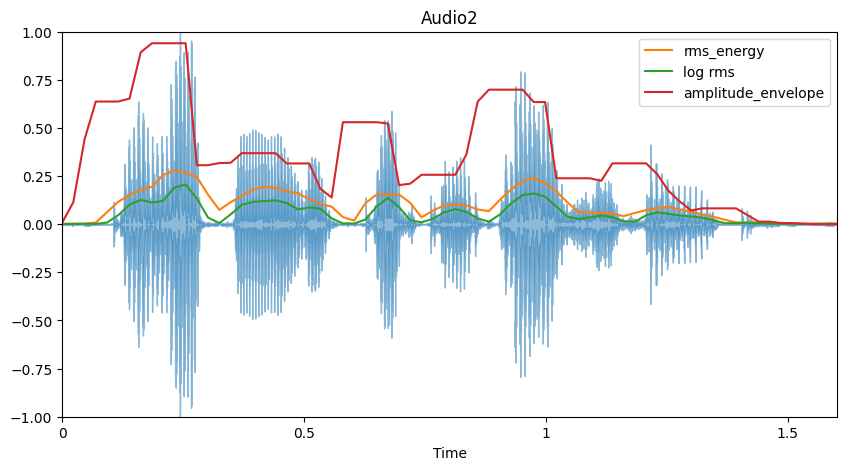

In [43]:
feature_visualization(audio2, sample_rate2, ['rms', 'rms_log', 'ae'], 'Audio2')

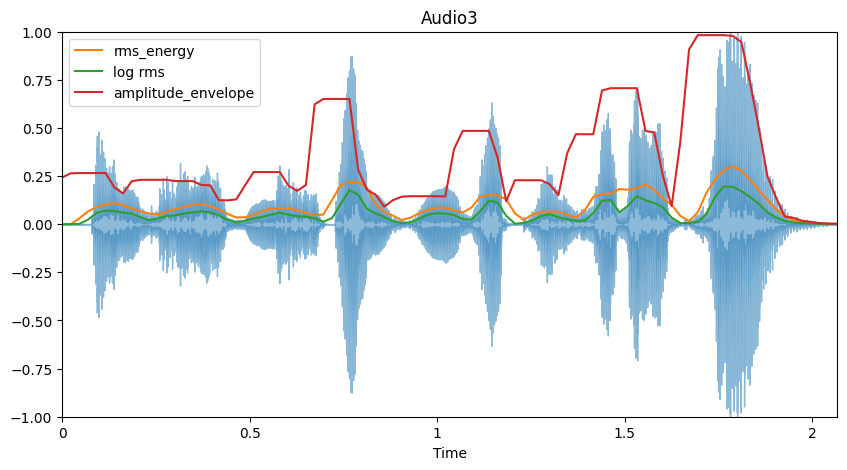

In [44]:
feature_visualization(audio3, sample_rate3, ['rms', 'rms_log', 'ae'], 'Audio3')

In [45]:
# function for zero crossing rate
# rate at which a signal changes from positive to zero to negative or from negative to zero to positive
# how often does signal cross 0/horizontal axis?
def ZCR(y, frame_length=2048, hop_length=512):
    return librosa.feature.zero_crossing_rate(y=y, frame_length=frame_length, hop_length=hop_length)[0]

Overall number of zero crossings: 3987


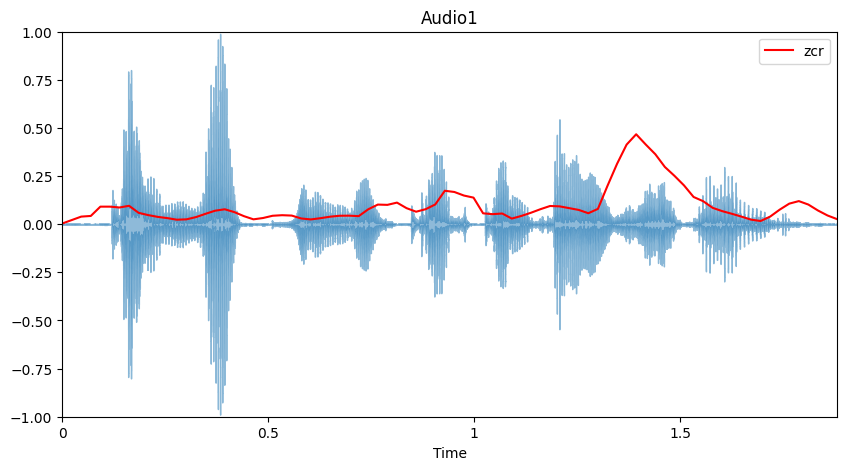

In [46]:
feature_visualization(audio1, sample_rate1, ['zcr'], 'Audio1')

Overall number of zero crossings: 2357


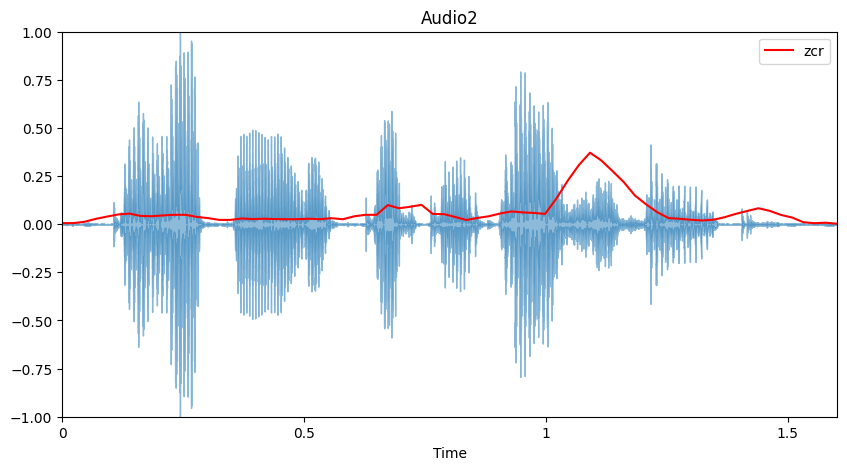

In [47]:
feature_visualization(audio2, sample_rate2, ['zcr'], 'Audio2')

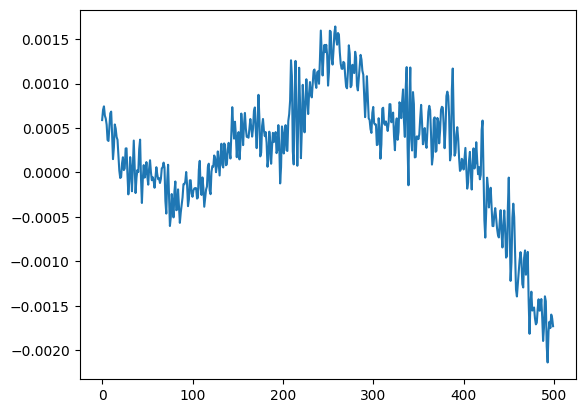

In [48]:
# zoom in
plt.plot(audio1[1500:2000])
plt.show()

In [49]:
zero_crossings = librosa.zero_crossings(audio1[1500:2000], pad=False) # actual number of zero crossing within that chosen frame
print(sum(zero_crossings))

43


# Entropy
## Spectral Entropy

In [50]:
# from source code librosa generate frames
def frames_gen(y, center=True, frame_length=2048, hop_length=512, pad_mode="constant"):
    if y is not None:
        if center:
            padding = [(0, 0) for _ in range(y.ndim)]
            padding[-1] = (int(frame_length // 2), int(frame_length // 2))
            y = np.pad(y, padding, mode=pad_mode)
            
    return librosa.util.frame(y, frame_length=frame_length, hop_length=hop_length) 

In [51]:
# function for computation of spectral entropy
'''
    Spectral Entropy is defined to be the Shannon entropy of the power
    spectral density (PSD) of the data:
    .. math:: H(x, sf) =  -\\sum_{f=0}^{f_s/2} P(f) \\log_2[P(f)]
    Where :math:`P` is the normalised PSD, and :math:`f_s` is the sampling frequency.
'''

def spectral_entropy(y, sf, center=True):
    frames = frames_gen(y, center=center)
    frames = np.transpose(frames)
    spectral = [ant.spectral_entropy(frame, sf=sf, method='welch', normalize=True) for frame in frames]   
    return spectral

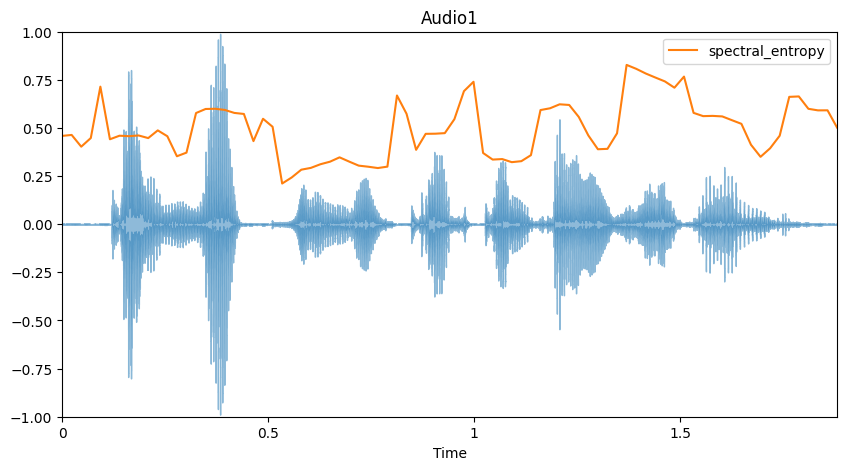

In [52]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy'], 'Audio1')

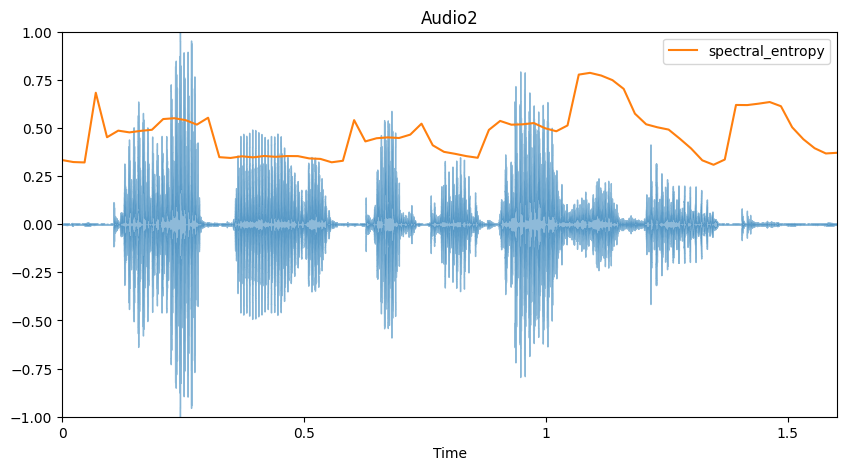

In [53]:
feature_visualization(audio2, sample_rate2, ['spectral_entropy'], 'Audio2')

In [54]:
# understand zero crossing rate (feature computation) form source code
y = audio1
frame_length = 2048
hop_length = 512

padding = [(0, 0) for _ in range(y.ndim)]
padding[-1] = (int(frame_length // 2), int(frame_length // 2))
y = np.pad(y, padding, mode="edge") 

y_framed = librosa.util.frame(y, frame_length=frame_length, hop_length=hop_length)

crossings = librosa.zero_crossings(y_framed, axis=-2, pad=False)

zcrate = np.mean(crossings, axis=-2, keepdims=True)

In [55]:
len(y)

43905

In [56]:
np.unique(np.transpose(crossings)[0], return_counts=True)

(array([False,  True]), array([2041,    7], dtype=int64))

In [57]:
np.transpose(zcrate)[0]

array([0.00341797])

In [58]:
print(np.unique(np.transpose(crossings)[1], return_counts=True))
print(np.transpose(zcrate)[1])

(array([False,  True]), array([2004,   44], dtype=int64))
[0.02148438]


-> zcr is approximately # of True / # of False, i.e. for frame 0: 7/2041 = 0.003

**Auffällig**: rms benutzt pad mode "constant" und zcr pad mode "edge" -> for spectral, pad mode "constant" benutzt

## Log Entropy

In [59]:
from pyAudioAnalysis import ShortTermFeatures

In [492]:
features, feature_names = ShortTermFeatures.feature_extraction(audio1, sample_rate1, window=2048, step=512, deltas=True)

Padding fehlt hier leider! (siehe Länge eines features)

In [493]:
features_df = pd.DataFrame(np.transpose(features), columns = feature_names)

In [494]:
features_df

zcr    energy  energy_entropy  spectral_centroid  spectral_spread  \
0   0.044944  0.000158        0.202020           0.307196         0.254320   
1   0.090865  0.005419        0.632103           0.210162         0.238073   
2   0.103566  0.024243        1.944438           0.174423         0.191153   
3   0.112848  0.027153        2.279127           0.171609         0.187015   
4   0.096238  0.027790        2.494044           0.165190         0.181620   
5   0.055203  0.023361        2.196109           0.170063         0.184112   
6   0.045432  0.005183        2.963052           0.163987         0.180069   
7   0.038105  0.004017        2.988144           0.142141         0.182082   
8   0.051783  0.021782        2.045277           0.177752         0.170330   
9   0.078652  0.032216        2.481999           0.167157         0.145672   
10  0.085979  0.031763        2.428951           0.167394         0.143905   
11  0.078652  0.030021        2.154915           0.171203         0.146564   
12  0.063996  0.011466        1.210941           0.198423         0.186084   
13  0.055203  0.000205        0.667733           0.192397         0.207753   
14  0.047875  0.000256        0.909760           0.189671         0.247193   
15  0.048852  0.002333        1.689351           0.116700         0.190727   
16  0.049829  0.003605        2.423557           0.102373         0.168566   
17  0.036150  0.004082        2.854985           0.128984         0.202132   
18  0.045921  0.004130        2.893523           0.185626         0.250212   
19  0.051783  0.004044        2.875888           0.211880         0.249797   
20  0.053737  0.004302        2.806017           0.254268         0.260004   
21  0.116268  0.003852        2.482407           0.266018         0.261267   
22  0.102101  0.003563        2.177911           0.263318         0.255250   
23  0.123107  0.001667        1.508362           0.247939         0.246028   
24  0.136297  0.001401        1.329604           0.194450         0.201340   
25  0.087934  0.005593        2.093718           0.176512         0.180498   
26  0.154861  0.005960        2.297800           0.191762         0.197624   
27  0.193942  0.005927        2.322379           0.202227         0.213401   
28  0.175867  0.004663        1.734468           0.207825         0.217835   
29  0.189057  0.001254        1.881634           0.261968         0.270865   
30  0.128969  0.005233        1.897503           0.212439         0.257626   
31  0.064973  0.006311        2.351145           0.176773         0.232509   
32  0.075232  0.006498        2.523280           0.170503         0.227595   
33  0.071324  0.005720        2.158235           0.121645         0.177868   
34  0.093796  0.004746        2.139568           0.152745         0.140465   
35  0.112360  0.006606        2.344221           0.172392         0.157252   
36  0.115779  0.008845        2.794174           0.187503         0.179773   
37  0.095750  0.011226        3.202502           0.191733         0.188083   
38  0.095261  0.008377        3.099639           0.210205         0.215993   
39  0.234978  0.005544        2.774005           0.322400         0.301580   
40  0.370298  0.003412        2.480457           0.414873         0.310528   
41  0.490962  0.001985        2.862977           0.505099         0.254543   
42  0.565217  0.002643        2.903318           0.535607         0.199534   
43  0.473376  0.002664        2.898440           0.511369         0.190136   
44  0.385442  0.002376        2.549907           0.496275         0.178534   
45  0.281387  0.001926        2.421552           0.385294         0.232496   
46  0.193942  0.001881        2.402287           0.253038         0.225913   
47  0.148510  0.003102        2.748751           0.191849         0.202169   
48  0.088911  0.003673        3.050931           0.181471         0.197374   
49  0.065462  0.003434        3.065805           0.172097         0.194048   
50  0.046898  0.002410        2

In [495]:
ZCR(audio1)

array([0.01855469, 0.03662109, 0.06152344, 0.10839844, 0.109375  ,
       0.11083984, 0.09716797, 0.05615234, 0.04638672, 0.0390625 ,
       0.05175781, 0.07861328, 0.08886719, 0.08056641, 0.06347656,
       0.05615234, 0.046875  , 0.04882812, 0.05175781, 0.0390625 ,
       0.046875  , 0.05273438, 0.0546875 , 0.11621094, 0.10595703,
       0.125     , 0.13818359, 0.08886719, 0.15478516, 0.19384766,
       0.17089844, 0.18212891, 0.12011719, 0.05810547, 0.07324219,
       0.07226562, 0.09472656, 0.11328125, 0.11669922, 0.09667969,
       0.09521484, 0.23388672, 0.36914062, 0.48876953, 0.56396484,
       0.47314453, 0.38623047, 0.28125   , 0.19482422, 0.1484375 ,
       0.08789062, 0.06542969, 0.04589844, 0.04541016, 0.0859375 ,
       0.125     , 0.13232422, 0.11914062, 0.06933594, 0.02392578])

In [486]:
features_df.columns

Index(['zcr', 'energy', 'energy_entropy', 'spectral_centroid',
       'spectral_spread', 'spectral_entropy', 'spectral_flux',
       'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5',
       'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10',
       'chroma_11', 'chroma_12', 'chroma_std', 'delta zcr', 'delta energy',
       'delta energy_entropy', 'delta spectral_centroid',
       'delta spectral_spread', 'delta spectral_entropy',
       'delta spectral_flux', 'delta spectral_rolloff', 'delta mfcc_1',
       'delta mfcc_2', 'delta mfcc_3', 'delta mfcc_4', 'delta mfcc_5',
       'delta mfcc_6', 'delta mfcc_7', 'delta mfcc_8', 'delta mfcc_9',
       'delta mfcc_10', 'delta mfcc_11', 'delta mfcc_12', 'delta mfcc_13',
       'delta chroma_1', 'delta chroma_2', 'delta chroma_3', 'delta chroma_4',
       'del

In [231]:
spectral_ent_norm = normalize(features[5])
spectral_ent_norm

array([[0.08553723],
       [0.04616323],
       [0.83993292],
       [0.20816979],
       [0.18186132],
       [0.16661762],
       [0.15656101],
       [0.15597829],
       [0.11350713],
       [0.12740908],
       [0.00986848],
       [0.05029067],
       [0.2702286 ],
       [0.35672528],
       [0.36582399],
       [0.37061079],
       [0.38487379],
       [0.41559093],
       [0.22823446],
       [0.1252808 ],
       [0.13351193],
       [0.06312397],
       [0.00556496],
       [0.        ],
       [0.00742251],
       [0.01885313],
       [0.04159786],
       [0.08989551],
       [0.15941427],
       [0.14604903],
       [0.14989094],
       [0.1593994 ],
       [0.17928772],
       [0.69382477],
       [0.43112698],
       [0.21448592],
       [0.28218931],
       [0.27076563],
       [0.29115017],
       [0.37927072],
       [0.450246  ],
       [0.720954  ],
       [0.09784797],
       [0.04606872],
       [0.04032258],
       [0.01930167],
       [0.02161615],
       [0.057

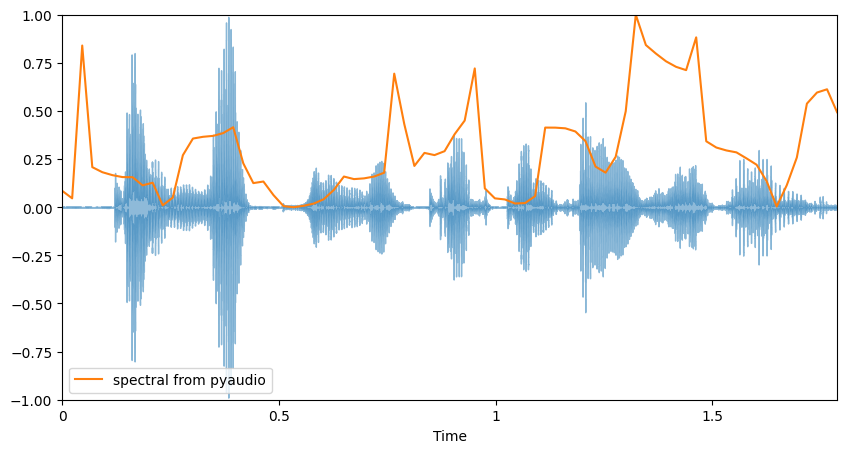

In [64]:
t = librosa.frames_to_time(range(78), hop_length=512)

plt.figure(figsize=(10, 5))
librosa.display.waveshow(audio1, alpha=0.5)
plt.plot(t, spectral_ent_norm, label='spectral from pyaudio')
plt.ylim((-1, 1))
plt.xlim((t[0],t[-1]))
plt.legend()
plt.show()

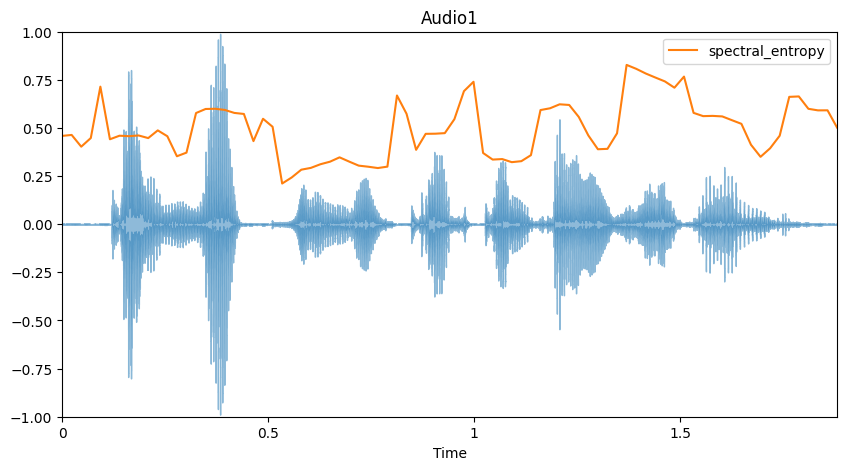

In [65]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy'], 'Audio1')

Have similar shapes but the one from antropy makes more sense compared to other features from librosa. Here we can use padding; in PyAudioaAnalysis no option for padding -> use antropy

In [236]:
def shannon_entropy(y, base=None):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    entropy_contour = [entropy(np.histogram(frame, bins=len(frame), density=True)[0], base=base) for frame in frames]
    return normalize(entropy_contour)

In [67]:
def shannon_entropy2(y, base=None):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    entropies = []
    
    for frame in frames: 
        hist, bin_edges = np.histogram(frame, bins=len(frame), density=True)
        probs = hist * np.diff(bin_edges)
        entropies.append(entropy(probs, base=base))
    
    return entropies

not necessary; already works with first version! Have almost completely same numbers/results!

"With an appropriate normalization, the power spectrum of an audio signal can be interpreted as a probability density." - https://www.researchgate.net/publication/231167623_On_the_Generalization_of_Shannon_Entropy_for_Speech_Recognition
-> use power spectrum as probability density of the audio signal!! Histogram is also working! Can compare both!

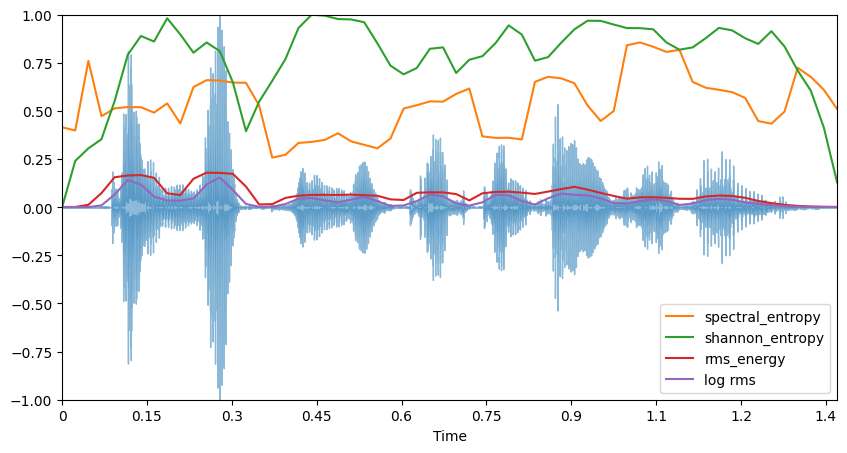

In [235]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'rms', 'rms_log'])

In [69]:
def threshold_entropy(y):
    thrd = np.mean(np.abs(y)) # threshold is the mean of the absolute signal 

    filtered_signal = np.array([1 if np.abs(val) >= thrd else 0 for val in y])
    frames = frames_gen(filtered_signal)
    frames = np.transpose(frames)
    return [np.mean(frame) for frame in frames]

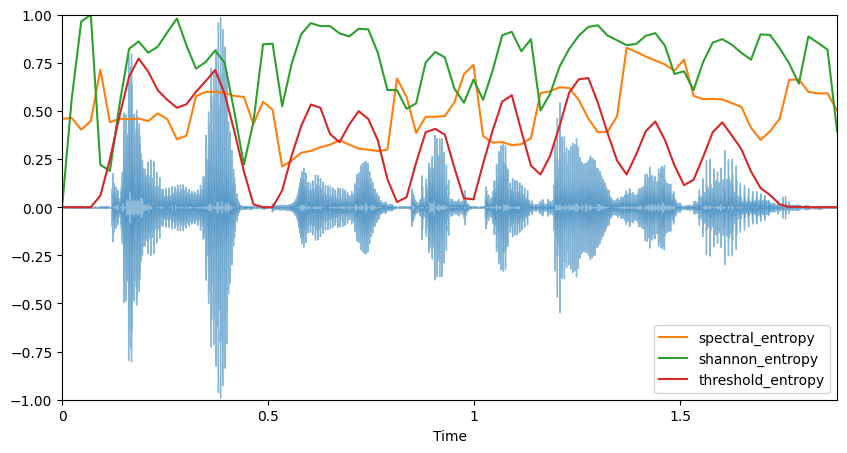

In [70]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy'])

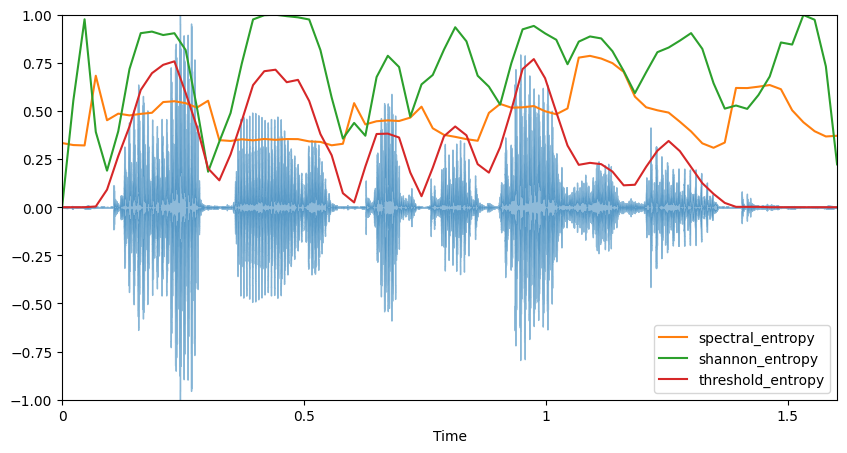

In [71]:
feature_visualization(audio2, sample_rate2, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy'])

In [72]:
def threshold_entropy2(y): # as version 2
    thrd = 0.2 * np.max(np.abs(y))

    filtered_signal = np.array([1 if np.abs(val) >= thrd else 0 for val in y])
    frames = frames_gen(filtered_signal)
    frames = np.transpose(frames)
    return [np.mean(frame) for frame in frames]

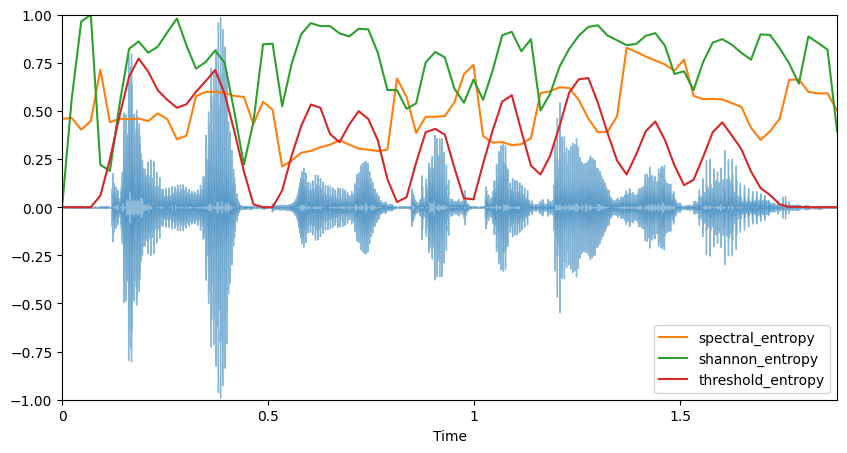

In [73]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy'])

In [408]:
def log_energy_entropy(y):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    # 0 is ignored for log computation; otherwise we would get distorted results moving between 0 and 1!
    filtered_frames = [frame[frame != 0] for frame in frames] 
    log_entropy = np.nan_to_num([np.sum(np.log(np.square(frame))) for frame in filtered_frames]) 
    return normalize(log_entropy)

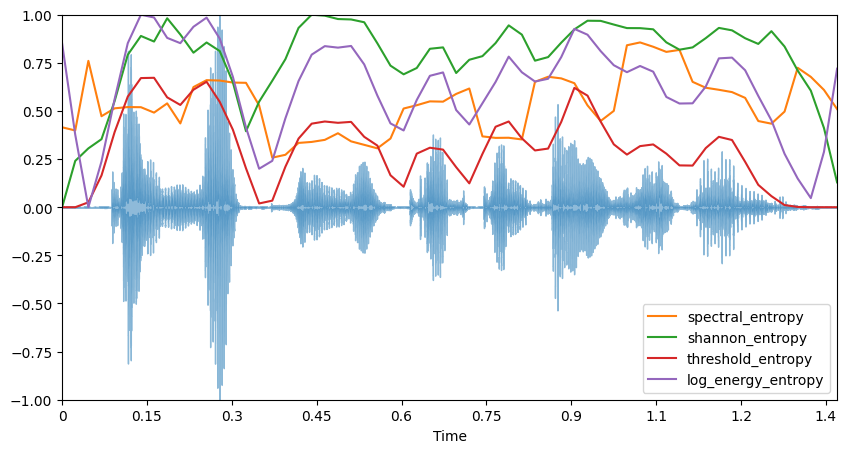

In [409]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy', 
                                             'log_energy_entropy'])

In [243]:
def sure_entropy(y, threshold=0.05):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    sure_ent = []
    
    for frame in frames: 
        hist, bin_edges = np.histogram(frame, bins=len(frame), density=True)
        probs = hist * np.diff(bin_edges)
        sure_ent.append(np.sum(np.minimum(probs, threshold)))

    return normalize(sure_ent)

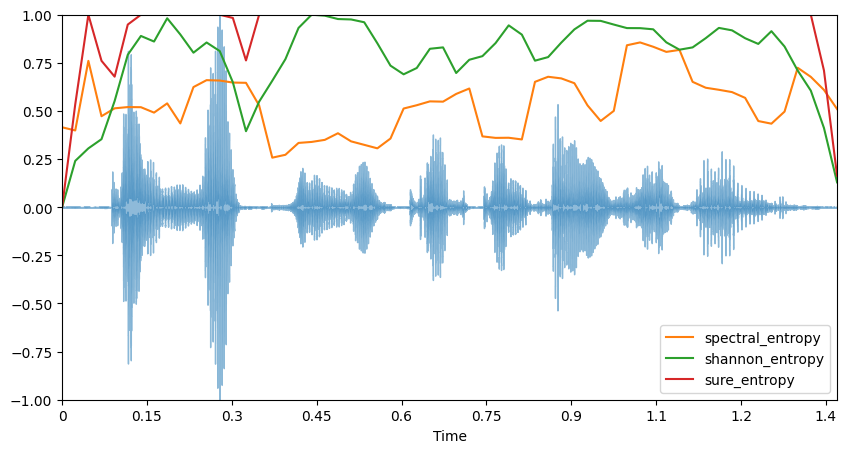

In [244]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'sure_entropy'])

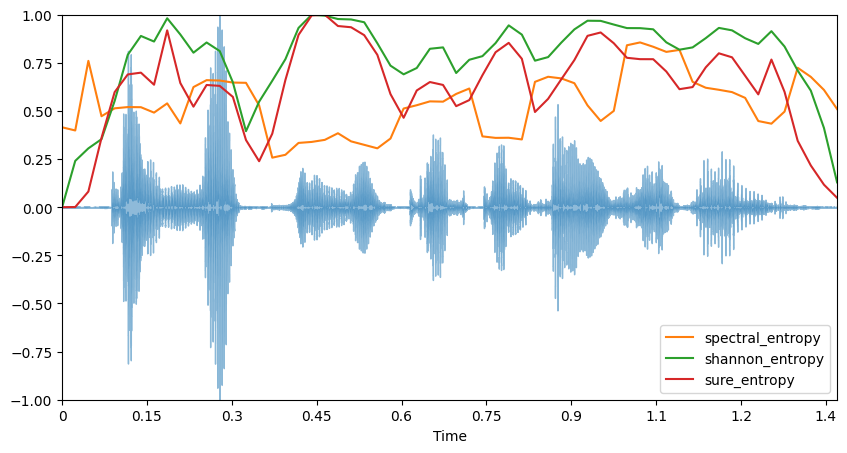

In [245]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'sure_entropy'], sure_threshold=0.0005)

# Statistical Features

In [81]:
def freq_statistics(y):
    """
    computes statistics
    """
    freqs = np.fft.fftfreq(y.size)
    
    mean = np.mean(freqs)
    median = np.median(freqs)
    std = np.std(freqs) 
    var = np.var(freqs)
    maxi = np.amax(freqs) 
    mini = np.amin(freqs) 
    
    return [mean, median, std, var, maxi, mini]

In [82]:
freq_statistics(audio1)

[9.336514911915691e-18,
 0.0,
 0.2886751345124288,
 0.08333333328576888,
 0.4999880545667391,
 -0.4999880545667391]

In [83]:
freq_statistics(audio2)

[1.07994336263462e-17,
 0.0,
 0.28867513448046883,
 0.08333333326731678,
 0.49998592698922006,
 -0.49998592698922006]

In [84]:
freq_statistics(audio3)

[-4.6925982853092583e-17,
 0.0,
 0.28867513452669225,
 0.08333333329400387,
 0.4999891377549912,
 -0.4999891377549912]

# Preprocessing 
In [1]: noise filtering & normalization before feature extraction; in others: do not mention pre-processing -> only apply normalization or not at all because no big difference!?

In [98]:
audio2_norm = librosa.util.normalize(audio2)

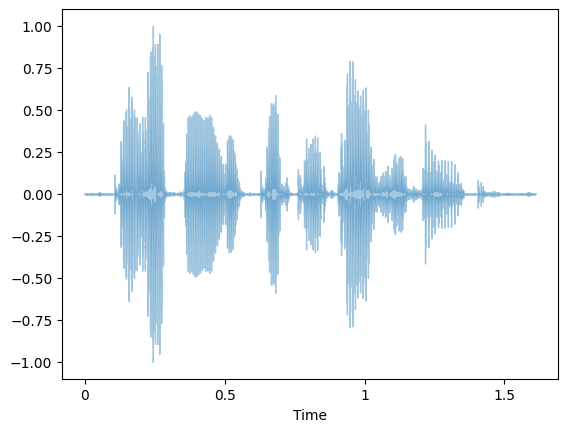

In [99]:
librosa.display.waveshow(audio2_norm, sr=sample_rate2, alpha=0.4)

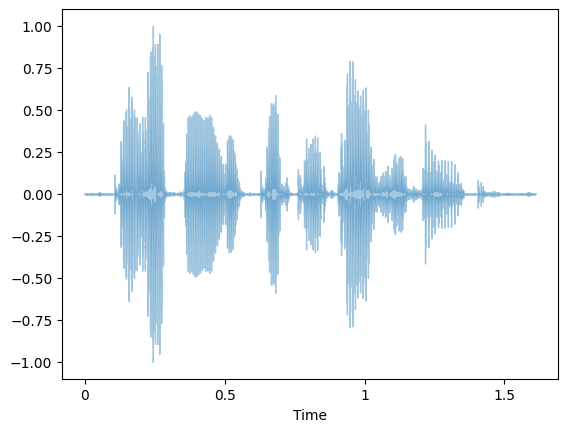

In [100]:
librosa.display.waveshow(audio2, sr=sample_rate2, alpha=0.4)

In [101]:
audio2_norm==audio2

array([False, False, False, ..., False, False,  True])

In [102]:
audio2_norm[10]

0.0004349502

In [103]:
audio2[10]

0.00043515034

In [108]:
audio2.max()

0.94020975

In [109]:
audio2_norm.max()

0.9397773

In [110]:
audio1.max()

0.9999695

In [111]:
audio1_norm.max()

1.0

# LPC

In [170]:
def lpc(y, order=4):
    return librosa.lpc(y, order=order)

In [127]:
lpc(audio1).shape

(6,)

In [248]:
def visualize_lpc(y, order):
    """
    from https://librosa.org/doc/main/generated/librosa.lpc.html
    """
    a = librosa.lpc(y, order=order)
    b = np.hstack([[0], -1 * a[1:]])
    y_hat = scipy.signal.lfilter(b, [1], y)
    fig, ax = plt.subplots()
    ax.plot(y)
    ax.plot(y_hat, linestyle='--')
    ax.legend(['y', 'y_hat'])
    ax.set_title('LP Model Forward Prediction')
    plt.show()

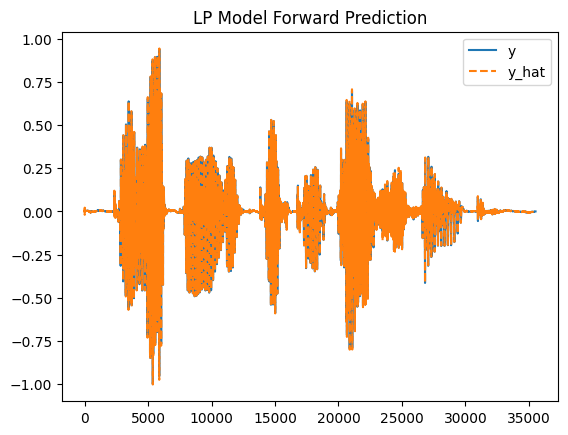

In [249]:
visualize_lpc(audio2, 16)

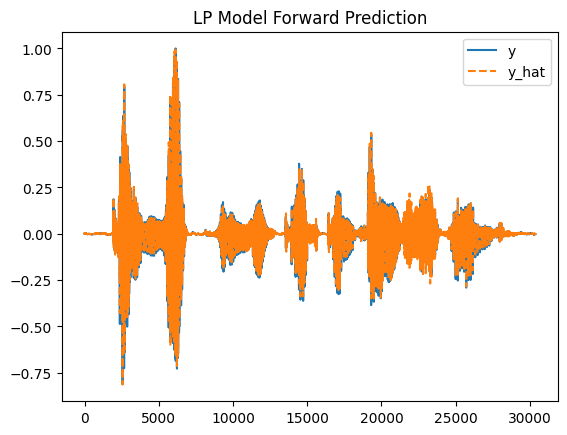

In [161]:
visualize_lpc(audio1, 16)

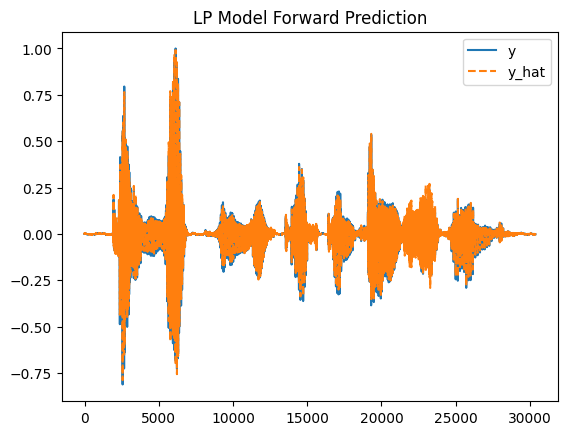

In [168]:
visualize_lpc(audio1, 4)

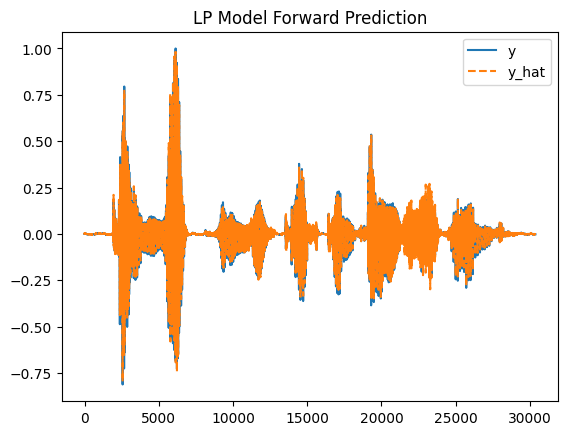

In [169]:
visualize_lpc(audio1, 5)

-> quite estimation with order=4 achieved!

# Energy

In [227]:
def energy(y):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    ener = [np.sum(np.square(frame)) for frame in frames]
    
    return normalize(ener)

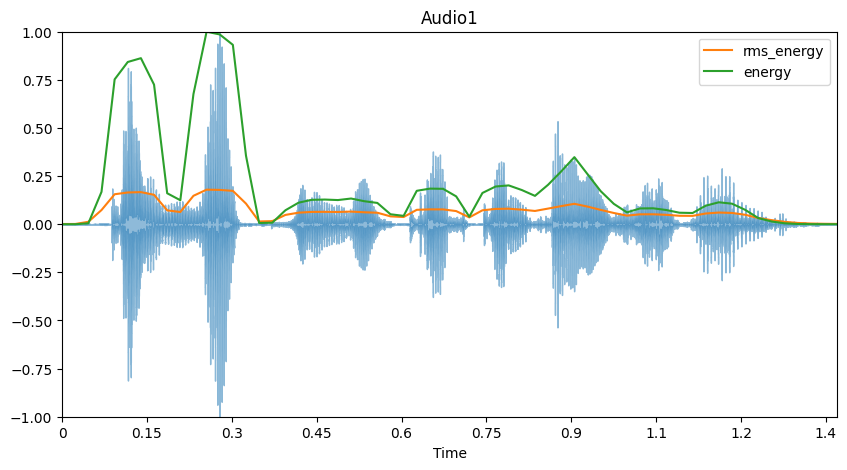

In [226]:
feature_visualization(audio1, sample_rate1, ['energy', 'rms'], 'Audio1')

In [222]:
def normalize(x):
    return sklearn.preprocessing.MinMaxScaler().fit_transform(np.array(x).reshape(-1,1))

In [214]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [185]:
x

MinMaxScaler(feature_range=[0.0026489068, 0.003430198, 0.32241118, 11.104954,
                            49.6757, 55.64046, 56.9451, 47.869926, 10.622198,
                            8.232104, 44.638214, 66.017334, 65.08752, 61.516994,
                            23.495008, 0.4199703, 0.5253811, 4.782196,
                            7.3873525, 8.365075, 8.462575, 8.287053, 8.8152895,
                            7.8945594, 7.3023267, 3.4174263, 2.8691852,
                            11.461156, 12.21264, 12.14604, ...])

In [220]:
from sklearn.preprocessing import MinMaxScaler
>>> data = np.array([-1, -0.5, 0, 1]).reshape(-1, 1)
>>> scaler = MinMaxScaler()
>>> print(scaler.fit(data))

MinMaxScaler()


In [221]:
scaler.transform(data)

array([[0.  ],
       [0.25],
       [0.5 ],
       [1.  ]])

# Fundamental Frequency

In [279]:
def f0_comp(y, sr):
    f0, voiced_flag, voiced_prob = librosa.pyin(y=y, sr=sr, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), hop_length=512)
    f0 = np.nan_to_num(f0) # convert nan values to 0
    return f0, voiced_flag, voiced_prob

In [280]:
f0_comp(audio1, sample_rate1)

(array([  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
        141.83073393, 140.20166901, 144.30989149, 161.98237639,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 234.43211036, 202.90956259,
        173.60841241, 165.76853496, 168.66611791, 223.84553226,
        227.75828325, 233.08188076, 241.30149553,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 188.23090565, 183.93170582, 181.81906999,
        171.61434972, 139.39416681, 159.19961612, 201.74088951,
        226.44649206, 249.8109744 , 260.11871293, 258.62053938,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 113.87914162, 112.57112812, 109.36644662,
        108.73654224,  99.71184888, 102.04250286, 100.87044475,
         96.31529725,   0.        ,   0.        ,   0.        ]),
 array([False, False, False, False, Fa

When estimating the fundamental frequency with probabilistic YIN algorithm, we can see that we only get values where the algorithm estimates voiced sections.

# Formant detection using Praat
following https://github.com/drfeinberg/PraatScripts/blob/master/Measure%20Pitch%2C%20HNR%2C%20Jitter%2C%20Shimmer%2C%20and%20Formants.ipynb

In [259]:
import parselmouth 
from parselmouth import praat

In [260]:
audio1_praat = parselmouth.Sound(audio1_path) 

In [261]:
audio1_praat

In [369]:
# compute the formants
"""
from https://www.fon.hum.uva.nl/praat/manual/Sound__To_Formant__burg____.html
Time step (s): If you set the time step to 0.0 (the standard), Praat will use a time step that is equal to 25 percent of
the analysis window length
Maximum number of formants: usually 5
Formant ceiling (Hz): is speaker-dependent! for female 5500 Hz, for male rather 5000 Hz; crucial to set this value 
correct
Window length


The sound will be resampled to a sampling frequency of twice the value of Formant ceiling -> so usually should take the 
values below but to keep consistency maybe take 8000? but then not accurate!? 

Other values are okay!?


returns: a dictionary with median of formants!
"""
def formant_analysis(y_path, gender, formant_order):
    y = parselmouth.Sound(y_path) # get the praat sound
    
    # compute the occurrences of periodic instances in the signal
    f0min=75
    f0max=600 # in the example it was 300; but here we see standard is 600 (https://www.fon.hum.uva.nl/praat/manual/Sound__To_Pitch__ac____.html)
    pointProcess = praat.call(y, "To PointProcess (periodic, cc)", f0min, f0max)
    
    # define maximal frequency depending on gender
    if gender == 'female':
        formant_ceiling = 5500
    else: 
        formant_ceiling = 5000

    formants = praat.call(y, "To Formant (burg)", 0.0025, 5, formant_ceiling, 0.025, 50) # formants definition
    
    # assign formant values with times where they make sense (periodic instances)
    numPoints = praat.call(pointProcess, "Get number of points")
    
    # define a dictionary to save the formants of the specified order and initialize with empty list
    form_dict = {}
    for order in range(1, formant_order+1):
        form_dict[order] = []

        for point in range(0, numPoints):
            point += 1
            t = praat.call(pointProcess, "Get time from index", point)
            formant = praat.call(formants, "Get value at time", order, t, 'Hertz', 'Linear')
            if str(formant) != 'nan':
                form_dict[order].append(formant)
        form_dict[order] = np.median(form_dict[order])
    
    return form_dict

In [366]:
formant_analysis(audio1_path, 'male', formant_order=4)

{1: 367.6153422440674,
 2: 1729.0118722080774,
 3: 2692.849025068226,
 4: 3718.263121661569}

In [368]:
formant_analysis(audio2_path, 'male', formant_order=4)

{1: 384.1957653830559,
 2: 1512.7309371243227,
 3: 2428.8124458639268,
 4: 3471.515166836066}

In [370]:
formant_analysis(audio3_path, 'male', formant_order=4)

{1: 478.72662870338615,
 2: 1559.1466604917346,
 3: 2614.72149562139,
 4: 3591.4016972489453}

# Pitch
The fundamental frequency is closely related to pitch, which is defined as our perception of fundamental frequency. That is, the F0 describes the actual physical phenomenon, whereas pitch describes how our ears and brains interpret the signal, in terms of periodicity.

Code mainly from https://readthedocs.org/projects/parselmouth/downloads/pdf/latest/

In [410]:
pitch = audio1_praat.to_pitch()
pitch

In [444]:
def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.xlim([audio1_praat.xmin, audio1_praat.xmax])
    plt.ylabel("fundamental frequency [Hz]")

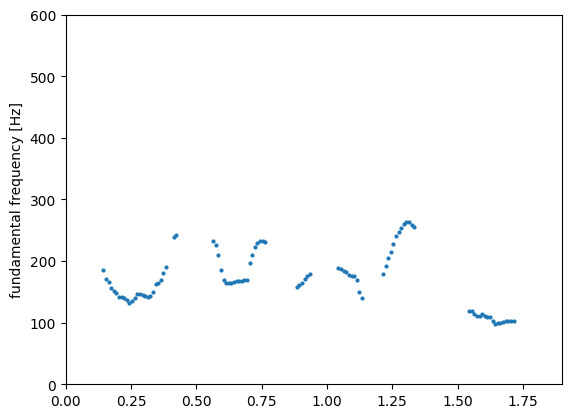

In [445]:
draw_pitch(pitch)

In [416]:
f0

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       141.83073393, 140.20166901, 144.30989149, 161.98237639,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 234.43211036, 202.90956259,
       173.60841241, 165.76853496, 168.66611791, 223.84553226,
       227.75828325, 233.08188076, 241.30149553,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        , 188.23090565, 183.93170582, 181.81906999,
       171.61434972, 139.39416681, 159.19961612, 201.74088951,
       226.44649206, 249.8109744 , 260.11871293, 258.62053938,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        , 113.87914162, 112.57112812, 109.36644662,
       108.73654224,  99.71184888, 102.04250286, 100.87044475,
        96.31529725,   0.        ,   0.        ,   0.        ])

In [417]:
pitch.selected_array['frequency']

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       185.34606525, 170.3098038 , 165.47517704, 155.489495  ,
       151.87689735, 147.66003206, 142.26017366, 141.74923876,
       140.8298368 , 136.98709291, 132.17649185, 135.81295366,
       140.86268246, 146.07280778, 146.58613352, 145.03320345,
       142.9515135 , 141.98552102, 143.2778601 , 149.55875314,
       162.81678364, 165.16797284, 168.78917972, 180.29984134,
       189.72727527,   0.        ,   0.        , 239.52009115,
       241.93067101,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 232.74985533, 226.30217742,
       209.87001708, 185.49827491, 169.79369835, 165.18904739,
       164.82221175, 164.99029791, 165.86511661, 168.03

In [418]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

In [420]:
def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

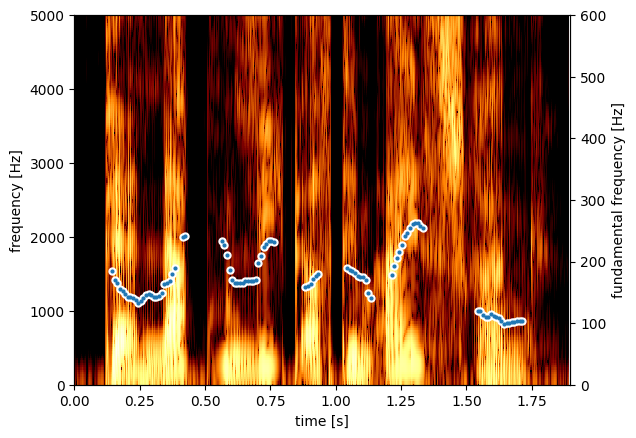

In [429]:
intensity = audio1_praat.to_intensity()
spectrogram = audio1_praat.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([audio1_praat.xmin, audio1_praat.xmax])
plt.show()

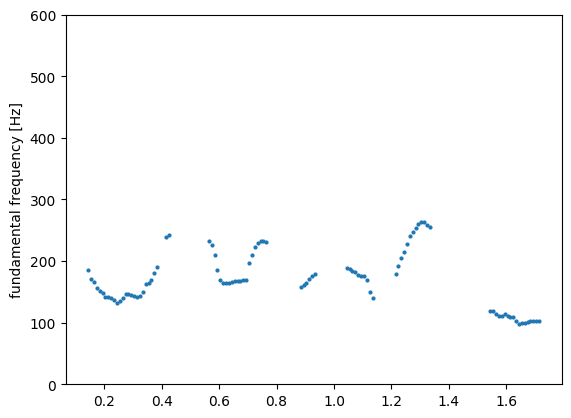

In [426]:
draw_pitch(pitch)

In [427]:
pre_emphasized_snd = audio1_praat.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)

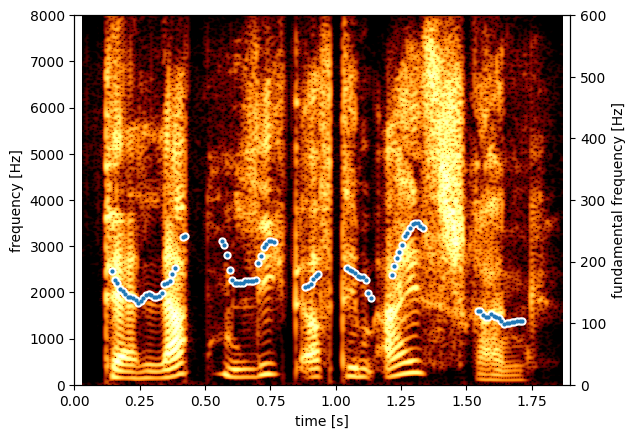

In [428]:
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([audio1_praat.xmin, audio1_praat.xmax])
plt.show()

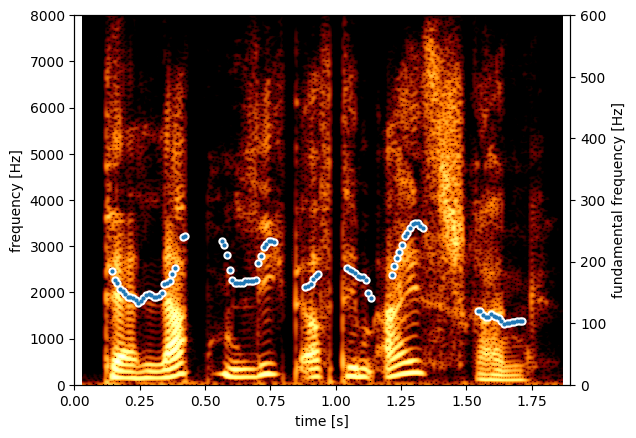

In [430]:
spectrogram = audio1_praat.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([audio1_praat.xmin, audio1_praat.xmax])
plt.show()

-> pre-emphasize seems nicer!

In [437]:
pitch = audio1_praat.to_pitch()
pitch_values = pitch.selected_array['frequency']
print("The maximum pitch frequency is = {maximum} Hz , at time t = {time} seconds".format(maximum = np.nanmax(pitch_values), time =  pitch.xs()[np.nanargmax(pitch_values)]))
print("The minimum pitch frequency is = {minimum} Hz , at time t = {time} seconds".format(minimum = np.nanmin(pitch_values), time =  pitch.xs()[np.nanargmin(pitch_values)]))

The maximum pitch frequency is = 263.084839437405 Hz , at time t = 1.314125 seconds
The minimum pitch frequency is = 0.0 Hz , at time t = 0.02412499999999995 seconds


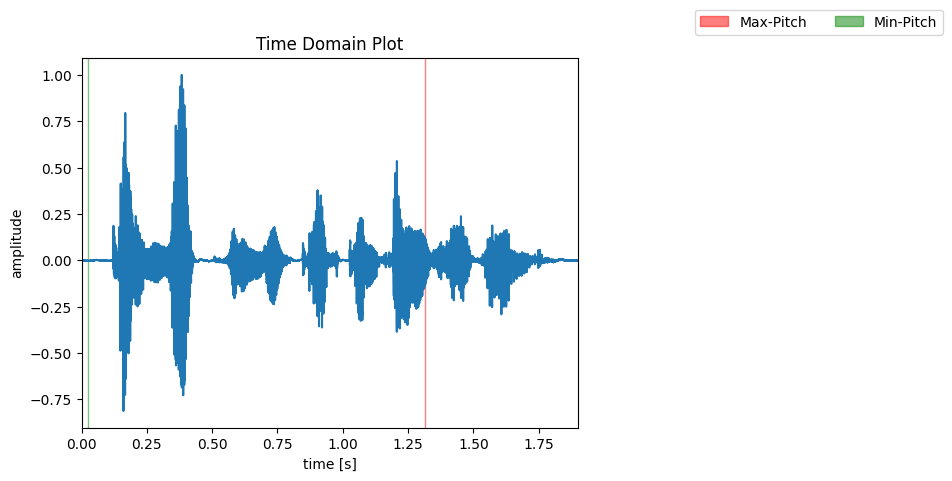

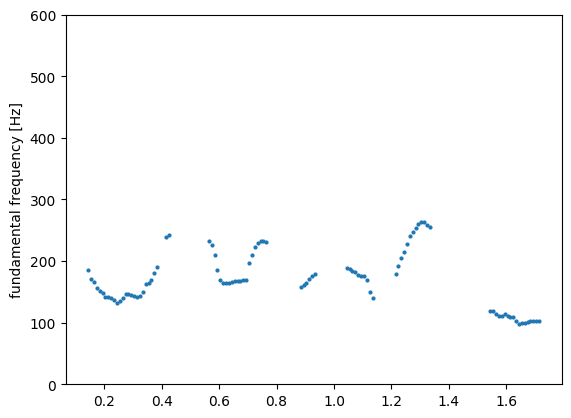

In [443]:
plt.figure()
plt.plot(audio1_praat.xs(), audio1_praat.values.T)
plt.xlim([audio1_praat.xmin, audio1_praat.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.axvspan(1.314,1.316, color = 'red', alpha = 0.5, label = "Max-Pitch")
plt.axvspan(0.024,0.026, color = 'green' , alpha = 0.5, label = "Min-Pitch" )

plt.legend(bbox_to_anchor =(1.75, 1.15), ncol = 2) 
plt.title('Time Domain Plot')
plt.show()

draw_pitch(pitch)

# Speed of speech (speaking rate) 
from https://github.com/drfeinberg/PraatScripts/blob/master/syllable_nuclei.py based on De Jong, N.H. & Wempe, T. (2009). Praat script to detect syllable nuclei and measure speech rate automatically. Behavior research methods, 41 (2), 385 - 390. 

In [482]:
from parselmouth.praat import call

def speech_rate(filename):
    silencedb = -25
    mindip = 2
    minpause = 0.3
    sound = parselmouth.Sound(filename)
    originaldur = sound.get_total_duration()
    intensity = sound.to_intensity(50)
    start = call(intensity, "Get time from frame number", 1)
    nframes = call(intensity, "Get number of frames")
    end = call(intensity, "Get time from frame number", nframes)
    min_intensity = call(intensity, "Get minimum", 0, 0, "Parabolic")
    max_intensity = call(intensity, "Get maximum", 0, 0, "Parabolic")

    # get .99 quantile to get maximum (without influence of non-speech sound bursts)
    max_99_intensity = call(intensity, "Get quantile", 0, 0, 0.99)

    # estimate Intensity threshold
    threshold = max_99_intensity + silencedb
    threshold2 = max_intensity - max_99_intensity
    threshold3 = silencedb - threshold2
    if threshold < min_intensity:
        threshold = min_intensity

    # get pauses (silences) and speakingtime
    textgrid = call(intensity, "To TextGrid (silences)", threshold3, minpause, 0.1, "silent", "sounding")
    silencetier = call(textgrid, "Extract tier", 1)
    silencetable = call(silencetier, "Down to TableOfReal", "sounding")
    npauses = call(silencetable, "Get number of rows")
    speakingtot = 0
    for ipause in range(npauses):
        pause = ipause + 1
        beginsound = call(silencetable, "Get value", pause, 1)
        endsound = call(silencetable, "Get value", pause, 2)
        speakingdur = endsound - beginsound
        speakingtot += speakingdur

    intensity_matrix = call(intensity, "Down to Matrix")
    # sndintid = sound_from_intensity_matrix
    sound_from_intensity_matrix = call(intensity_matrix, "To Sound (slice)", 1)
    # use total duration, not end time, to find out duration of intdur (intensity_duration)
    # in order to allow nonzero starting times.
    intensity_duration = call(sound_from_intensity_matrix, "Get total duration")
    intensity_max = call(sound_from_intensity_matrix, "Get maximum", 0, 0, "Parabolic")
    point_process = call(sound_from_intensity_matrix, "To PointProcess (extrema)", "Left", "yes", "no", "Sinc70")
    # estimate peak positions (all peaks)
    numpeaks = call(point_process, "Get number of points")
    t = [call(point_process, "Get time from index", i + 1) for i in range(numpeaks)]

    # fill array with intensity values
    timepeaks = []
    peakcount = 0
    intensities = []
    for i in range(numpeaks):
        value = call(sound_from_intensity_matrix, "Get value at time", t[i], "Cubic")
        if value > threshold:
            peakcount += 1
            intensities.append(value)
            timepeaks.append(t[i])

    # fill array with valid peaks: only intensity values if preceding
    # dip in intensity is greater than mindip
    validpeakcount = 0
    currenttime = timepeaks[0]
    currentint = intensities[0]
    validtime = []

    for p in range(peakcount - 1):
        following = p + 1
        followingtime = timepeaks[p + 1]
        dip = call(intensity, "Get minimum", currenttime, timepeaks[p + 1], "None")
        diffint = abs(currentint - dip)
        if diffint > mindip:
            validpeakcount += 1
            validtime.append(timepeaks[p])
        currenttime = timepeaks[following]
        currentint = call(intensity, "Get value at time", timepeaks[following], "Cubic")

    # Look for only voiced parts
    pitch = sound.to_pitch_ac(0.02, 30, 4, False, 0.03, 0.25, 0.01, 0.35, 0.25, 450)
    voicedcount = 0
    voicedpeak = []

    for time in range(validpeakcount):
        querytime = validtime[time]
        whichinterval = call(textgrid, "Get interval at time", 1, querytime)
        whichlabel = call(textgrid, "Get label of interval", 1, whichinterval)
        value = pitch.get_value_at_time(querytime) 
        if not math.isnan(value):
            if whichlabel == "sounding":
                voicedcount += 1
                voicedpeak.append(validtime[time])

    # calculate time correction due to shift in time for Sound object versus
    # intensity object
    timecorrection = originaldur / intensity_duration

    # Insert voiced peaks in TextGrid
    call(textgrid, "Insert point tier", 1, "syllables")
    for i in range(len(voicedpeak)):
        position = (voicedpeak[i] * timecorrection)
        call(textgrid, "Insert point", 1, position, "")

    # return results
    speakingrate = voicedcount / originaldur
    articulationrate = voicedcount / speakingtot
    npause = npauses - 1
    asd = speakingtot / voicedcount
    speechrate_dictionary = {'soundname':filename,
                             'nsyll':voicedcount,
                             'npause': npause,
                             'dur(s)':originaldur,
                             'phonationtime(s)':intensity_duration,
                             'speechrate(nsyll / dur)': speakingrate,
                             "articulation rate(nsyll / phonationtime)":articulationrate,
                             "ASD(speakingtime / nsyll)":asd}
    return speechrate_dictionary

In [483]:
speech_rate(audio1_path)

{'soundname': '../data\\wav/03a01Fa.wav',
 'nsyll': 6,
 'npause': 0,
 'dur(s)': 1.89825,
 'phonationtime(s)': 1.89825,
 'speechrate(nsyll / dur)': 3.1608060055314104,
 'articulation rate(nsyll / phonationtime)': 3.1608060055314104,
 'ASD(speakingtime / nsyll)': 0.316375}

In [484]:
speech_rate(audio2_path)

{'soundname': '../data\\wav/03a01Nc.wav',
 'nsyll': 6,
 'npause': 0,
 'dur(s)': 1.61125,
 'phonationtime(s)': 1.61125,
 'speechrate(nsyll / dur)': 3.7238169123351432,
 'articulation rate(nsyll / phonationtime)': 3.7238169123351432,
 'ASD(speakingtime / nsyll)': 0.2685416666666667}

# Brightness (spectral centroid)
spectral centroid measures brightness of the sound; it is the centre of gravity of the magnitude spectrum, the frequency band where most of the energy is concentrated (see https://github.com/kimlindner/AudioSignalProcessingForML/)

In [519]:
def spectral_centroid(y, sr, frame_length=2048, hop_length=512):
    spectral_cent = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=frame_length, hop_length=hop_length)[0]
    return normalize(spectral_cent)

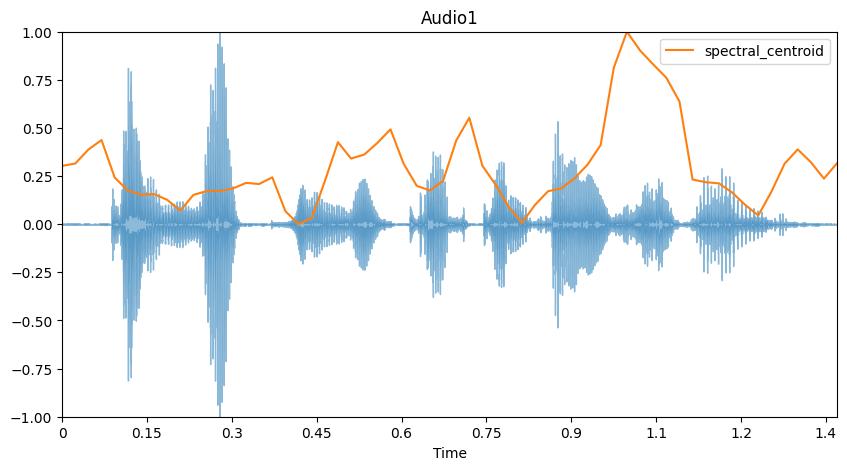

In [520]:
feature_visualization(audio1, sample_rate1, ['spectral_centroid'], 'Audio1')

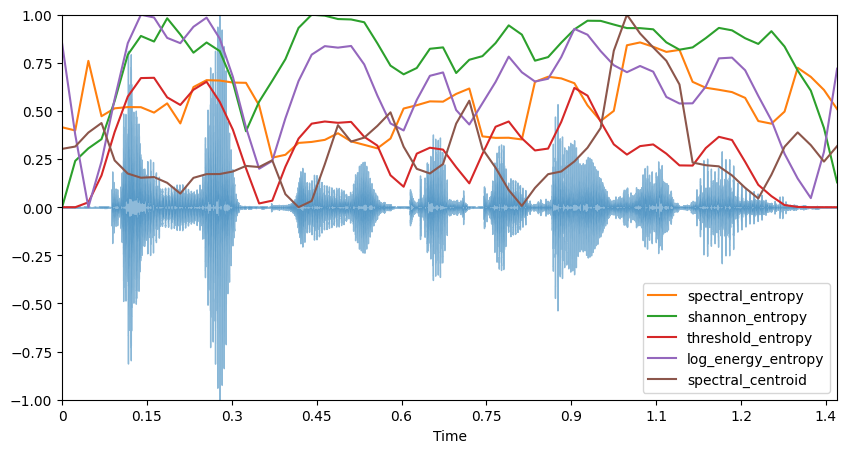

In [521]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy', 
                                             'log_energy_entropy', 'spectral_centroid'])

# MFCCs

In [52]:
def mfcc_comp(y, sr, number, window):
    return librosa.feature.mfcc(y=y, n_mfcc=number, sr=sr, window=window)

In [54]:
# visualizing MFCCs
def mfcc_visualization(mfccs, sr, title=None):
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(mfccs, x_axis="time", sr=sr)
    plt.colorbar(format="%+2.f")
    plt.title('MFCCs ' + '{}'.format(title))
    plt.show()

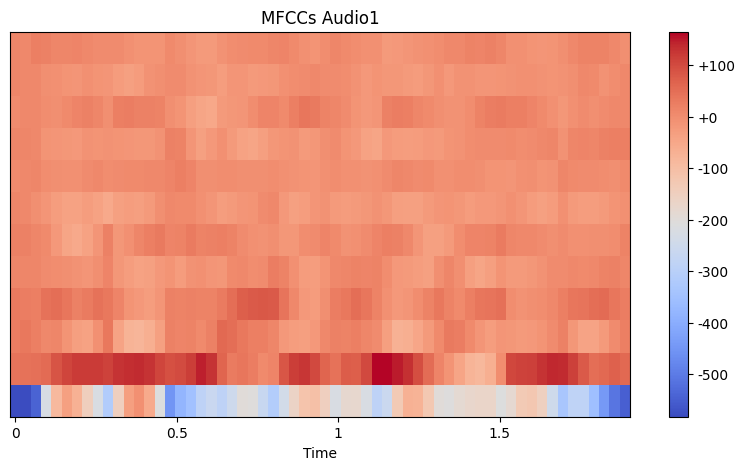

In [56]:
mfcc_visualization(mfcc_comp(audio1, sample_rate1, 12, window='hann'), sample_rate1, title='Audio1')

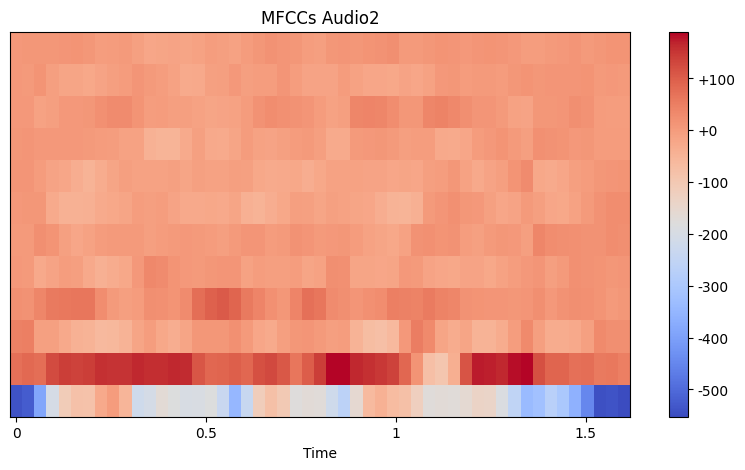

In [58]:
mfcc_visualization(mfcc_comp(audio2, sample_rate2, 12, 'hann'), sample_rate2, title='Audio2')

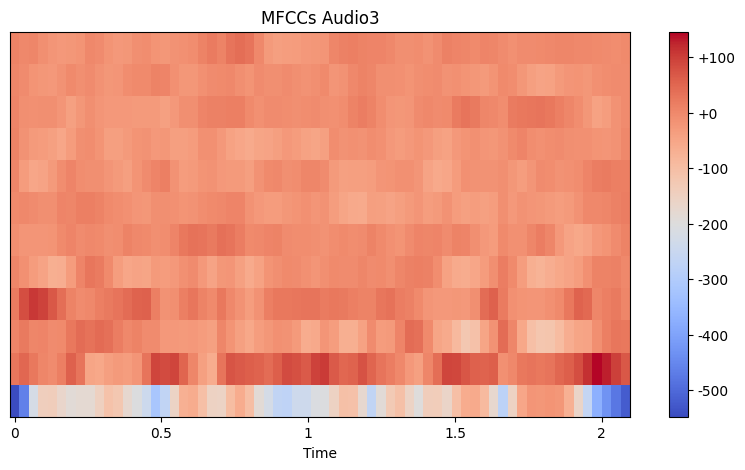

In [59]:
mfcc_visualization(mfcc_comp(audio3, sample_rate3, 12, 'hann'), sample_rate3, title='Audio3')

In [538]:
mfcc_comp(audio1, sample_rate1, 12).shape

(12, 60)

### compare Hann window (default) to Hamming window

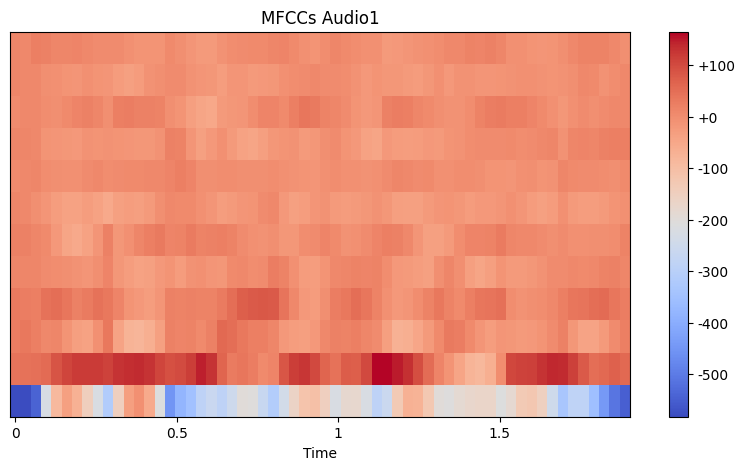

In [60]:
mfcc_visualization(mfcc_comp(audio1, sample_rate1, 12, window='hann'), sample_rate1, title='Audio1')

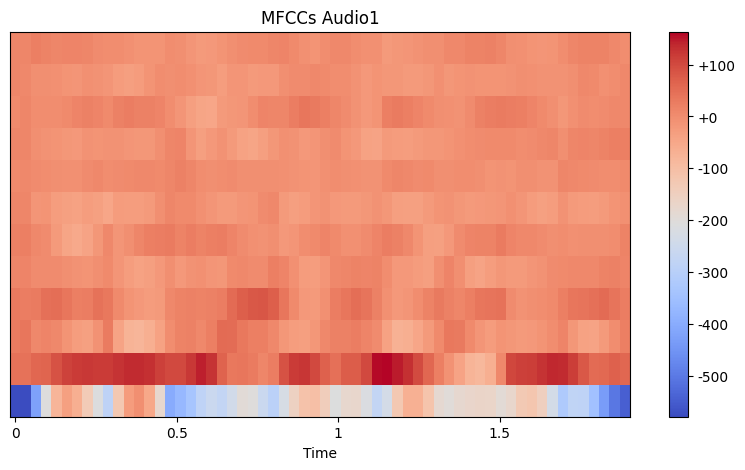

In [61]:
mfcc_visualization(mfcc_comp(audio1, sample_rate1, 12, window='hamming'), sample_rate1, title='Audio1')

There is no big difference between Hann and Hamming window. This gets clear when looking at the functions: 
- Hann window: $w(n) = 0.5 - 0.5 \cos\big(\frac{2\pi n}{M -1}\big),  0 \leq n \leq M-1$
- Hamming window: $w(n) = 0.54 - 0.46 \cos\big(\frac{2\pi n}{M -1}\big),  0 \leq n \leq M-1$

We decide to leave it to the default Hann window even though we read more about Hamming window. Librosa is using Hann window by default, and they are both "bell" like functions to smooth the beginning and ending of the signal with only slight changes in stremgth.

# Average Change Rate

In [564]:
f0

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       141.83073393, 140.20166901, 144.30989149, 161.98237639,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 234.43211036, 202.90956259,
       173.60841241, 165.76853496, 168.66611791, 223.84553226,
       227.75828325, 233.08188076, 241.30149553,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        , 188.23090565, 183.93170582, 181.81906999,
       171.61434972, 139.39416681, 159.19961612, 201.74088951,
       226.44649206, 249.8109744 , 260.11871293, 258.62053938,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        , 113.87914162, 112.57112812, 109.36644662,
       108.73654224,  99.71184888, 102.04250286, 100.87044475,
        96.31529725,   0.        ,   0.        ,   0.        ])

In [560]:
t = librosa.frames_to_time(range(feature_length_computation(audio1, sample_rate1, hop_length=512, frame_length=2048)
                                    ), hop_length=512)

In [563]:
t

array([0.        , 0.02321995, 0.04643991, 0.06965986, 0.09287982,
       0.11609977, 0.13931973, 0.16253968, 0.18575964, 0.20897959,
       0.23219955, 0.2554195 , 0.27863946, 0.30185941, 0.32507937,
       0.34829932, 0.37151927, 0.39473923, 0.41795918, 0.44117914,
       0.46439909, 0.48761905, 0.510839  , 0.53405896, 0.55727891,
       0.58049887, 0.60371882, 0.62693878, 0.65015873, 0.67337868,
       0.69659864, 0.71981859, 0.74303855, 0.7662585 , 0.78947846,
       0.81269841, 0.83591837, 0.85913832, 0.88235828, 0.90557823,
       0.92879819, 0.95201814, 0.9752381 , 0.99845805, 1.021678  ,
       1.04489796, 1.06811791, 1.09133787, 1.11455782, 1.13777778,
       1.16099773, 1.18421769, 1.20743764, 1.2306576 , 1.25387755,
       1.27709751, 1.30031746, 1.32353741, 1.34675737, 1.36997732])

In [568]:
avg_change_rate = []
for i in range(len(f0)-1):
    avg_change_rate.append((f0[i+1] - f0[i]) / (t[i+1] - t[i]))

avg_change_rate

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6108.140006094138,
 -70.15797179165894,
 176.92637841828457,
 761.0904142769396,
 -6975.998826997712,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 10096.148502733926,
 -1357.5628482702864,
 -1261.895237003203,
 -337.63534731087356,
 124.78848453033727,
 2376.3790749883187,
 168.50812336795042,
 229.2682132469118,
 353.9892690657985,
 -10391.988235348923,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8106.428651535736,
 -185.15108628660852,
 -90.98363289351074,
 -439.4806288578253,
 -1387.607486710173,
 852.9495258132181,
 1832.0997620590258,
 1063.9815163510152,
 1006.224288018063,
 443.91725506810377,
 -64.52095046076113,
 -11137.857213636285,
 0.0,
 0.0,
 0.0,
 0.0,
 4904.365376518081,
 -56.33144089664722,
 -138.0141153685862,
 -27.127717975608824,
 -388.661110597792,
 100.37289140871906,
 -50.47633075823459,
 -196.17383267178698,
 -4147.953719658148,
 0.0,
 0.0]

# LPCC
Test with code from: https://www.kaggle.com/code/sourabhy/working-with-speech-part-2

In [5]:
def autocorr(self, order=None):
    if order is None:
        order = len(self) - 1
    return [sum(self[n] * self[n + tau] for n in range(len(self) - tau)) for tau in range(order + 1)]

In [6]:
def core_lpcc(seq, err_term, order=None):
    if order is None:
        order = len(seq) - 1
    lpcc_coeffs = [np.log(err_term), -seq[0]]
    for n in range(2, order + 1):
        # Use order + 1 as upper bound for the last iteration
        upbound = (order + 1 if n > order else n)
        lpcc_coef = -sum(i * lpcc_coeffs[i] * seq[n - i - 1]
                         for i in range(1, upbound)) * 1. / upbound
        lpcc_coef -= seq[n - 1] if n <= len(seq) else 0
        lpcc_coeffs.append(lpcc_coef)
    return lpcc_coeffs

In [10]:
def lpcc(lpcorder=None, cepsorder=None):
    coefs =  librosa.lpc(lpcorder, order=cepsorder)
    acseq =  np.array(autocorr(lpcorder, cepsorder))
    err_term =np.sqrt( acseq[0] + sum(a * c for a, c in zip(acseq[1:], coefs)))
    return core_lpcc(coefs, err_term, cepsorder)

In [11]:
lpccs = lpcc(audio1,16)
lpccs

[2.7347583744194774,
 -1.0,
 1.9801130294799805,
 -2.7814578612645464,
 4.654842294691207,
 -7.9603229968252665,
 13.991526283221013,
 -25.377648888465917,
 46.59124821330684,
 -86.87757578656215,
 164.0099341792405,
 -312.53515188713874,
 600.6136712796778,
 -1162.331724057408,
 2262.660217378642,
 -4427.321422862548,
 8701.413380453869]

# LPCMCCs

In [15]:
# Compute LPC coefficients
order = 12  # LP order
lpc = librosa.lpc(audio1, order=order)

# Compute mel filterbank coefficients
n_mels = 40  # number of Mel filterbanks
mel_basis = librosa.filters.mel(sr=sample_rate1, n_fft=len(audio1), n_mels=n_mels)

# Compute LPCMCC coefficients
n_mfcc = 13  # number of LPCMCC coefficients
lpcmcc = np.dot(mel_basis, lpc)
lpcmcc = librosa.feature.mfcc(S=librosa.power_to_db(lpcmcc), n_mfcc=n_mfcc)

print(lpcmcc)

ValueError: shapes (40,15187) and (13,) not aligned: 15187 (dim 1) != 13 (dim 0)

In [16]:
# on my own

In [17]:
# lpccs
# lpccs
def autocorr(self, order=None):
    """
    code from https://www.kaggle.com/code/sourabhy/working-with-speech
    :param self:
    :param order:
    :return:
    """
    if order is None:
        order = len(self) - 1
    return [sum(self[n] * self[n + tau] for n in range(len(self) - tau)) for tau in range(order + 1)]

### sieht so bisschen aus wie absolut berechnet; in anderen Beispielen durch Länge und Varianz geteilt (normalisiert)


def core_lpcc(seq, err_term, order=None):
    """
    code mainly from https://www.kaggle.com/code/sourabhy/working-with-speech, slight changes
    :param seq:
    :param err_term:
    :param order:
    :return:
    """
    if order is None:
        order = len(seq) - 1
    lpcc_coeffs = [np.log(err_term), -seq[0]] # lpcc coeffs for i=0,1
    for n in range(2, order): # lpcc coeffs for i=2,...,order-1 of lpccs
        # Use order as upper bound for the last iteration (want 0,...,order-1 lpccs)
        upbound = (order if n > order - 1 else n)
        lpcc_coef = -sum(i * lpcc_coeffs[i] * seq[n - i - 1]
                         for i in range(1, upbound)) * 1. / upbound # sum over upper bound - 1
        lpcc_coef -= seq[n - 1] if n <= len(seq) else 0 # for both cases (m<p and m>p)
        lpcc_coeffs.append(lpcc_coef)
    return lpcc_coeffs


def lpcc(y, cepsorder):
    """
    code from https://www.kaggle.com/code/sourabhy/working-with-speech but changed compuation of error term
    :param lpcorder:
    :param cepsorder:
    :return:
    """
    coefs =  librosa.lpc(y, order=cepsorder)
    acseq =  np.array(autocorr(y, cepsorder))
    # err_term = np.sqrt(acseq[0] + sum(a * c for a, c in zip(acseq[1:], coefs)))
    b = np.hstack([[0], -1 * coefs[1:]])
    y_hat = scipy.signal.lfilter(b, [1], y)
    err_term = np.sum(np.square(y - y_hat)) # computation from librosa source code
    return core_lpcc(coefs, err_term, cepsorder)

In [18]:
lpccs = lpcc(audio1, cepsorder=12)

In [49]:
order_k = 12
melcep_coefs = []
order_n = 12
alpha = 0.31

# initialize MCs(n) at iteration n = k (use order - 1 because we are going from 0)
melcep_coefs = [lpccs[order_n-1]]
melcep_coefs.extend(np.zeros(order_k-1))

for n in range(order_n-2, -1, -1): # order_n iterations going down
    melcep_coefs_old = melcep_coefs.copy()
    melcep_coefs[0] = lpccs[n] + alpha * melcep_coefs_old[0]
    melcep_coefs[1] = (1 - alpha)**2 * melcep_coefs_old[0] + alpha * melcep_coefs_old[1]
    
    for k in range(2, order_k): # order_k coefficients to compute
        melcep_coefs[k] = melcep_coefs_old[k-1] + alpha * (melcep_coefs_old[k] - melcep_coefs[k-1])
            
melcep_coefs

[2.9204283365068355,
 -0.12167162754512495,
 0.2987615272493243,
 -1.0826168968334824,
 -3.217132743455017,
 -14.60045471849827,
 -33.61383543389489,
 -50.54756896421803,
 -24.588949377615545,
 25.370287455697593,
 27.831474976026023,
 -32.4161938795402]

In [50]:
len(melcep_coefs)

12

In [51]:
n

0